In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 日本語フォントの設定
import matplotlib
matplotlib.rcParams['font.family'] = 'MS Gothic'  # WindowsのMSゴシック
# または
# matplotlib.rcParams['font.family'] = 'Yu Gothic'  # 游ゴシック
# matplotlib.rcParams['font.family'] = 'Meiryo'     # メイリオ

# マイナス記号が文字化けしないようにする
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
data = pd.read_csv("../data/bgg_dataset.csv")
data.head()

,,,,,,,,,,,,,,,,,,,,,ID;Name;Year Published;Min Players;Max Players;Play Time;Min Age;Users Rated;Rating Average;BGG Rank;Complexity Average;Owned Users;Mechanics;Domains
174430;Gloomhaven;2017;1;4;120;14;42055;8,79;1;3,86;68323;Action Queue,Action Retrieval,Campaign / Battle Card Driven,Card Play Conflict Resolution,Communication Limits,Cooperative Game,Deck Construction,Deck Bag and Pool Building,Grid Movement,Hand Management,Hexagon Grid,Legacy Game,Modular Board,Once-Per-Game Abilities,Scenario / Mission / Campaign Game,Simultaneous Action Selection,Solo / Solitaire Game,Storytelling,Variable Player Powers;Strategy Games,Thematic Games
161936;Pandemic Legacy: Season 1;2015;2;4;60;13;41643;8,61;2;2,84;65294;Action Points,Cooperative Game,Hand Management,Legacy Game,Point to Point Movement,Set Collection,Trading,Variable Player Powers;Strategy Games,Thematic Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224517;Brass: Birmingham;2018;2;4;120;14;19217;8,66;3;3,91;28785;Hand Management,Income,Loans,Market,Network and Route Building,Score-and-Reset Game,Tech Trees / Tech Tracks,Turn Order: Stat-Based,Variable Set-up;Strategy Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167791;Terraforming Mars;2016;1;5;120;12;64864;8,43;4;3,24;87099;Card Drafting,Drafting,End Game Bonuses,Hand Management,Hexagon Grid,Income,Set Collection,Solo / Solitaire Game,Take That,Tile Placement,Turn Order: Progressive,Variable Player Powers;Strategy Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233078;Twilight Imperium: Fourth Edition;2017;3;6;480;14;13468;8,70;5;4,22;16831;Action Drafting,Area Majority / Influence,Area-Impulse,Dice Rolling,Follow,Grid Movement,Hexagon Grid,Modular Board,Trading,Variable Phase Order,Variable Player Powers,Voting;Strategy Games,Thematic Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN


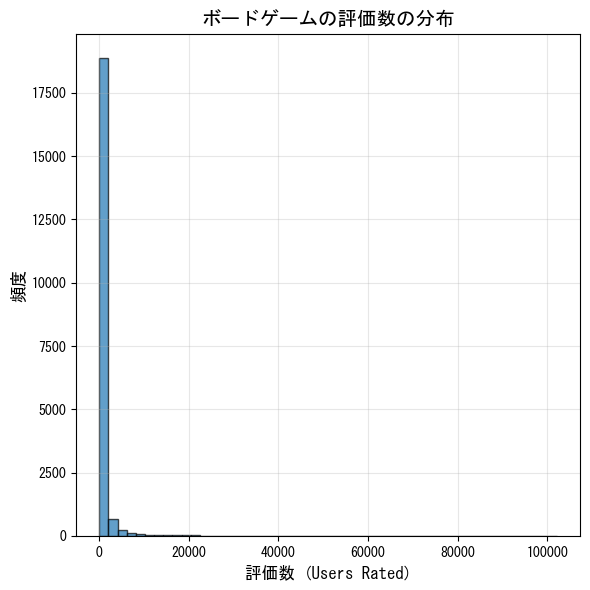

評価数の統計情報:
count     20343.000000
mean        840.971391
std        3511.562220
min          30.000000
25%          55.000000
50%         120.000000
75%         385.000000
max      102214.000000
Name: Users Rated, dtype: float64


In [3]:
# データを正しく読み込む(セパレータがセミコロン)
data = pd.read_csv("../data/bgg_dataset.csv", sep=';')

# 評価数(Users Rated)の分布をヒストグラムで表示
plt.figure(figsize=(6, 6))
plt.hist(data['Users Rated'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('評価数 (Users Rated)', fontsize=12)
plt.ylabel('頻度', fontsize=12)
plt.title('ボードゲームの評価数の分布', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 統計情報も表示
print(f"評価数の統計情報:")
print(data['Users Rated'].describe())

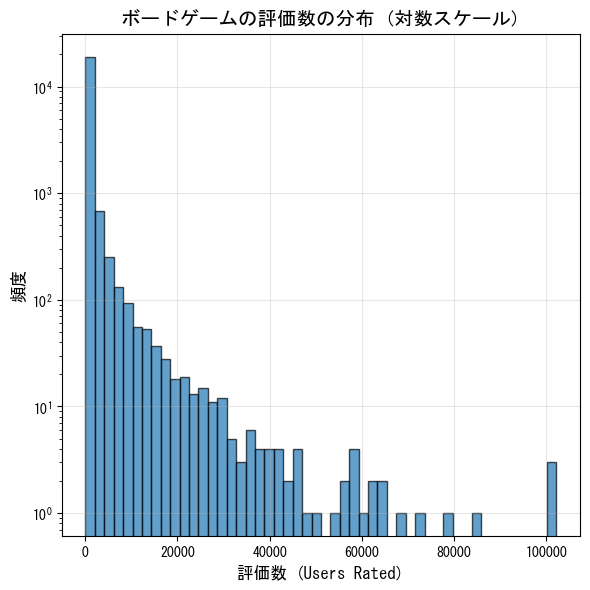

In [4]:
plt.figure(figsize=(6, 6))
plt.hist(data['Users Rated'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('評価数 (Users Rated)', fontsize=12)
plt.ylabel('頻度', fontsize=12)
plt.title('ボードゲームの評価数の分布 (対数スケール)', fontsize=14)
plt.yscale('log')  # Y軸を対数スケールに
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

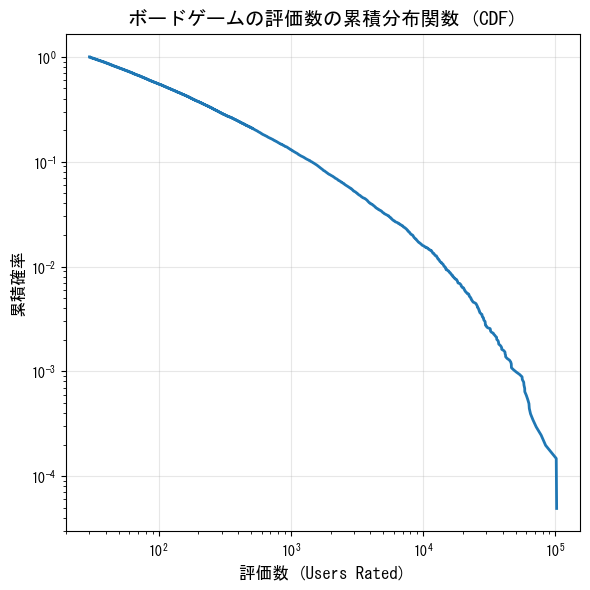

評価数のパーセンタイル:
  25%: 55人
  50%: 120人
  75%: 385人
  90%: 1430人
  95%: 3159人
  99%: 14434人


In [5]:
# 累積分布関数(CDF)をプロット
plt.figure(figsize=(6, 6))

# データをソートして累積確率を計算
sorted_data = np.sort(data['Users Rated'])[::-1]
cumulative_prob = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

plt.loglog(sorted_data, cumulative_prob, linewidth=2)
plt.xlabel('評価数 (Users Rated)', fontsize=12)
plt.ylabel('累積確率', fontsize=12)
plt.title('ボードゲームの評価数の累積分布関数 (CDF)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 主要なパーセンタイル値を表示
percentiles = [25, 50, 75, 90, 95, 99]
print("評価数のパーセンタイル:")
for p in percentiles:
    value = np.percentile(data['Users Rated'], p)
    print(f"  {p}%: {value:.0f}人")

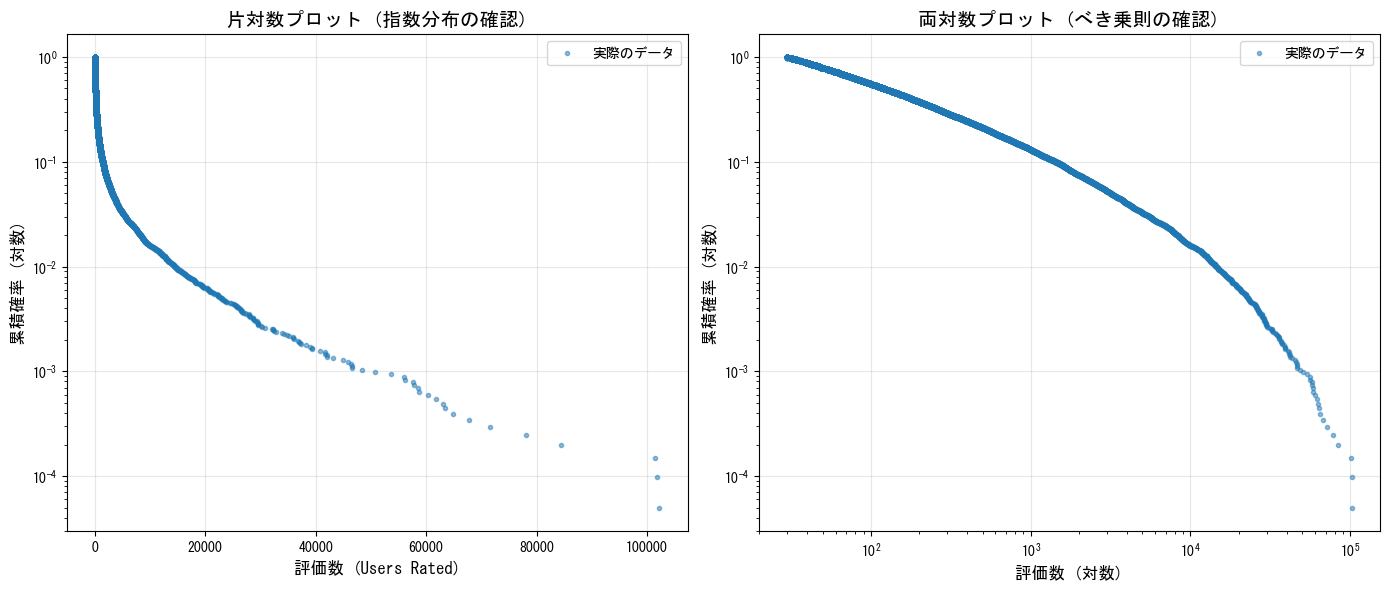

指数分布 vs べき乗則分布の比較

【指数分布のフィッティング】(片対数プロットの直線性)
  傾き: -0.000197
  決定係数 (R²): 0.4801
  p値: 0.000000e+00

【べき乗則分布のフィッティング】(両対数プロットの直線性)
  べき指数: -0.677
  決定係数 (R²): 0.9667
  p値: 0.000000e+00

結論:
✓ べき乗則分布の方が適合度が高い (R² = 0.9667)
  → データはべき乗則に従っている可能性が高い


In [6]:
import scipy.stats as stats

# 指数分布のフィッティング
# 指数分布の場合、片対数プロット(semilogy)で直線になる
plt.figure(figsize=(14, 6))

# 左: 片対数プロット(指数分布の確認)
plt.subplot(1, 2, 1)
plt.semilogy(sorted_data, cumulative_prob, 'o', markersize=3, alpha=0.5, label='実際のデータ')
plt.xlabel('評価数 (Users Rated)', fontsize=12)
plt.ylabel('累積確率 (対数)', fontsize=12)
plt.title('片対数プロット (指数分布の確認)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()

# 右: 両対数プロット(べき乗則の確認)
plt.subplot(1, 2, 2)
plt.loglog(sorted_data, cumulative_prob, 'o', markersize=3, alpha=0.5, label='実際のデータ')
plt.xlabel('評価数 (対数)', fontsize=12)
plt.ylabel('累積確率 (対数)', fontsize=12)
plt.title('両対数プロット (べき乗則の確認)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# 定量的な評価
# 指数分布のフィッティング
valid_idx = sorted_data > 0
x_valid = sorted_data[valid_idx]
y_valid = cumulative_prob[valid_idx]

# 片対数での線形回帰（指数分布）
log_y = np.log(y_valid)
slope_exp, intercept_exp, r_value_exp, p_value_exp, std_err_exp = stats.linregress(x_valid, log_y)

# 両対数での線形回帰（べき乗則）
log_x = np.log10(x_valid)
log_y_10 = np.log10(y_valid)
slope_power, intercept_power, r_value_power, p_value_power, std_err_power = stats.linregress(log_x, log_y_10)

print("=" * 60)
print("指数分布 vs べき乗則分布の比較")
print("=" * 60)
print("\n【指数分布のフィッティング】(片対数プロットの直線性)")
print(f"  傾き: {slope_exp:.6f}")
print(f"  決定係数 (R²): {r_value_exp**2:.4f}")
print(f"  p値: {p_value_exp:.6e}")

print("\n【べき乗則分布のフィッティング】(両対数プロットの直線性)")
print(f"  べき指数: {slope_power:.3f}")
print(f"  決定係数 (R²): {r_value_power**2:.4f}")
print(f"  p値: {p_value_power:.6e}")

print("\n" + "=" * 60)
print("結論:")
print("=" * 60)
if r_value_power**2 > r_value_exp**2:
    print(f"✓ べき乗則分布の方が適合度が高い (R² = {r_value_power**2:.4f})")
    print("  → データはべき乗則に従っている可能性が高い")
else:
    print(f"✓ 指数分布の方が適合度が高い (R² = {r_value_exp**2:.4f})")
    print("  → データは指数分布に従っている可能性が高い")

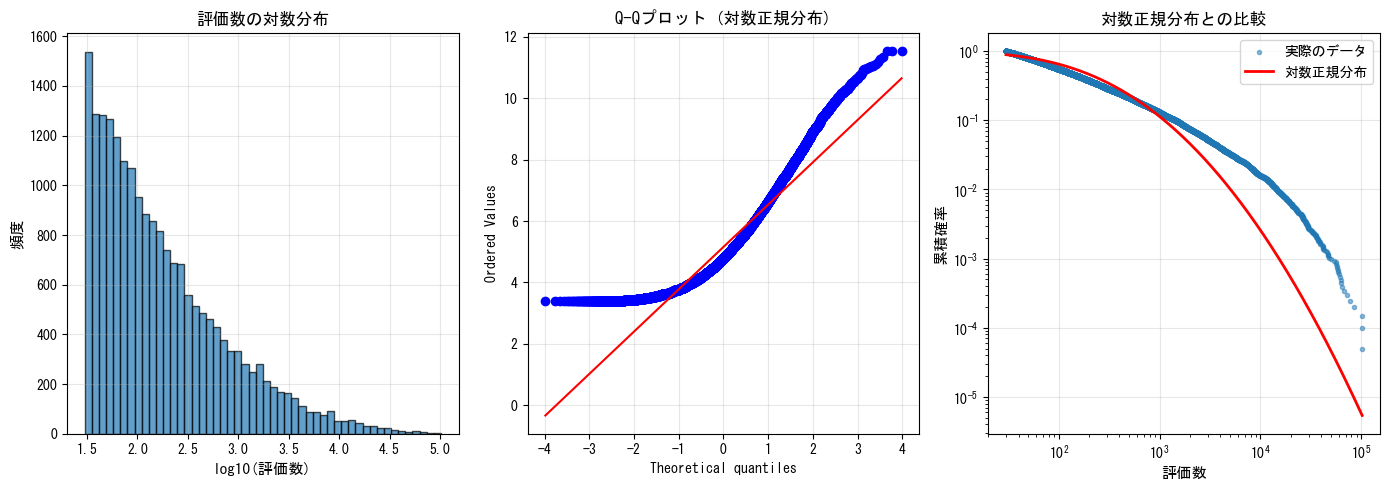

分布の適合度検定 (Kolmogorov-Smirnov検定)

対数正規分布:
  KS統計量: 0.1131
  p値: 0.000000
  パラメータ - shape: 1.450, scale: 173.4

分布の特徴分析

歪度 (Skewness): 12.352
尖度 (Kurtosis): 223.360

対数変換後の歪度: 1.112
対数変換後の尖度: 0.922

結論:
✓ 単純な理論分布では説明しきれない
  → 混合分布や複雑な分布の可能性


In [7]:
from scipy.stats import lognorm, expon, pareto
from scipy.optimize import curve_fit

# 1. 対数正規分布のフィッティング
# 評価数の対数をヒストグラムで確認
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.hist(np.log10(data['Users Rated'][data['Users Rated'] > 0]), bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('log10(評価数)', fontsize=11)
plt.ylabel('頻度', fontsize=11)
plt.title('評価数の対数分布', fontsize=12)
plt.grid(True, alpha=0.3)

# 2. Q-Qプロット（対数正規分布）
plt.subplot(1, 3, 2)
log_data = np.log(data['Users Rated'][data['Users Rated'] > 0])
stats.probplot(log_data, dist="norm", plot=plt)
plt.title('Q-Qプロット (対数正規分布)', fontsize=12)
plt.grid(True, alpha=0.3)

# 3. 累積分布の比較
plt.subplot(1, 3, 3)
sorted_data_pos = sorted_data[sorted_data > 0]
cumulative_prob_pos = cumulative_prob[:len(sorted_data_pos)]

# 対数正規分布のフィッティング
shape, loc, scale = lognorm.fit(data['Users Rated'][data['Users Rated'] > 0], floc=0)
lognorm_cdf = 1 - lognorm.cdf(sorted_data_pos, shape, loc, scale)

plt.loglog(sorted_data_pos, cumulative_prob_pos, 'o', markersize=3, alpha=0.5, label='実際のデータ')
plt.loglog(sorted_data_pos, lognorm_cdf, 'r-', linewidth=2, label='対数正規分布')
plt.xlabel('評価数', fontsize=11)
plt.ylabel('累積確率', fontsize=11)
plt.title('対数正規分布との比較', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 定量的な評価: 各分布のKS検定
from scipy.stats import kstest

users_rated_positive = data['Users Rated'][data['Users Rated'] > 0]

# 対数正規分布
ks_lognorm, p_lognorm = kstest(users_rated_positive, 
                                lambda x: lognorm.cdf(x, shape, loc, scale))

print("=" * 60)
print("分布の適合度検定 (Kolmogorov-Smirnov検定)")
print("=" * 60)
print(f"\n対数正規分布:")
print(f"  KS統計量: {ks_lognorm:.4f}")
print(f"  p値: {p_lognorm:.6f}")
print(f"  パラメータ - shape: {shape:.3f}, scale: {scale:.1f}")

# さらに詳細な分析
print("\n" + "=" * 60)
print("分布の特徴分析")
print("=" * 60)

# 歪度と尖度
from scipy.stats import skew, kurtosis
print(f"\n歪度 (Skewness): {skew(users_rated_positive):.3f}")
print(f"尖度 (Kurtosis): {kurtosis(users_rated_positive):.3f}")
print(f"\n対数変換後の歪度: {skew(np.log(users_rated_positive)):.3f}")
print(f"対数変換後の尖度: {kurtosis(np.log(users_rated_positive)):.3f}")

print("\n" + "=" * 60)
print("結論:")
print("=" * 60)
if abs(skew(np.log(users_rated_positive))) < 1 and abs(kurtosis(np.log(users_rated_positive))) < 3:
    print("✓ 対数変換後の分布が正規分布に近い")
    print("  → 対数正規分布に従っている可能性が高い")
else:
    print("✓ 単純な理論分布では説明しきれない")
    print("  → 混合分布や複雑な分布の可能性")

C:\Users\chiro\AppData\Local\Temp\ipykernel_10888\2497532336.py:9: RuntimeWarning: invalid value encountered in power
  return np.exp(-(x/lam)**beta)
C:\Users\chiro\AppData\Local\Temp\ipykernel_10888\2497532336.py:50: RuntimeWarning: divide by zero encountered in log
  log_log_prob = np.log(-np.log(valid_prob))


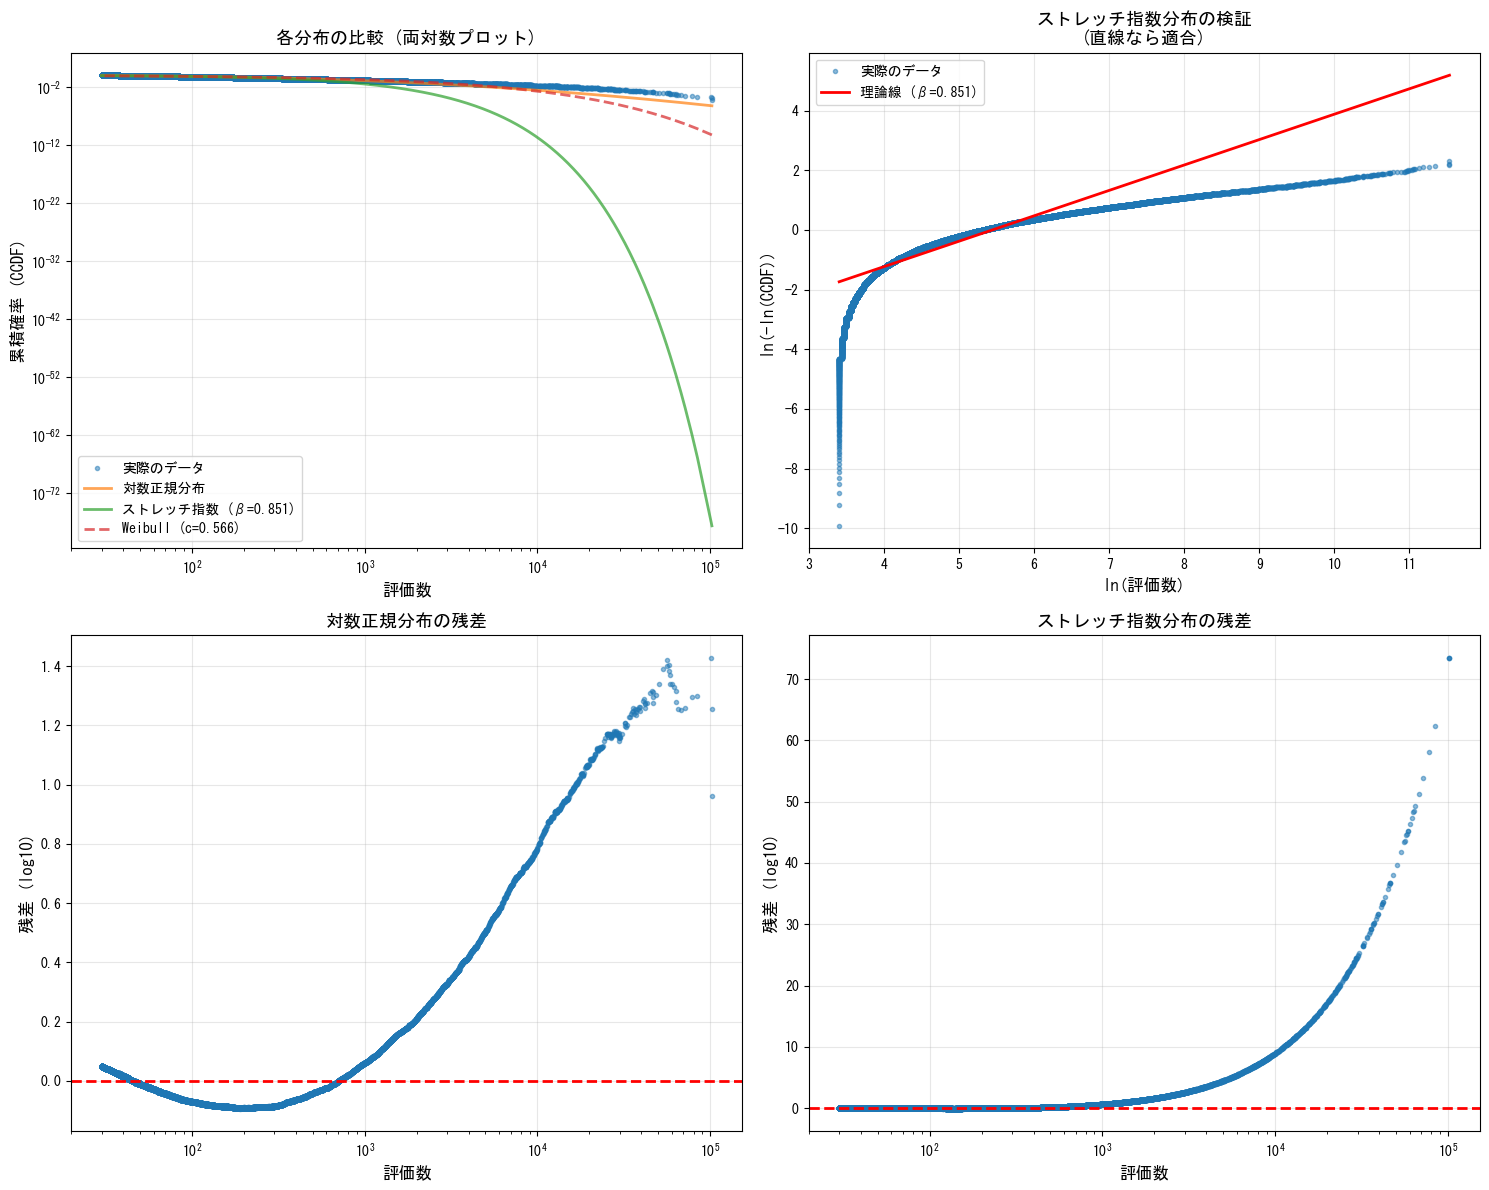

ストレッチ指数分布との比較

【ストレッチ指数分布のパラメータ】
  λ (スケールパラメータ): 231.1
  β (ストレッチ指数): 0.851
    β < 1: ストレッチ指数分布 (サブ指数的減衰)
    β = 1: 通常の指数分布
    β > 1: 指数分布より速い減衰

【Weibull分布のパラメータ】
  c (形状パラメータ): 0.566
  scale (スケールパラメータ): 382.2

【適合度の比較 (対数スケールでの評価)】
  対数正規分布:
    R²スコア: 0.8229
    RMSE: 0.1825

  ストレッチ指数分布:
    R²スコア: -44.4105
    RMSE: 2.9224

  Weibull分布:
    R²スコア: 0.5026
    RMSE: 0.3059

  べき乗則分布 (参考):
    R²スコア: 0.9667

総合評価:

最も適合度が高い分布: べき乗則 (R² = 0.9667)

【分布の解釈】
  β = 0.851 < 1 → サブ指数的減衰
  通常の指数分布よりも裾野が厚い (ヘビーテール)
  べき乗則と指数分布の中間的な性質


In [8]:
# ストレッチ指数分布(Stretched Exponential / Weibull Distribution)の検証
from scipy.stats import weibull_min
from scipy.optimize import curve_fit

# ストレッチ指数分布の累積分布関数
# P(x) = exp(-(x/λ)^β) where β is the stretch exponent
def stretched_exp_ccdf(x, lam, beta):
    """Complementary CDF (CCDF) of stretched exponential"""
    return np.exp(-(x/lam)**beta)

# データの準備
sorted_data_pos = sorted_data[sorted_data > 0]
cumulative_prob_pos = cumulative_prob[:len(sorted_data_pos)]

# ストレッチ指数分布のフィッティング
try:
    popt, pcov = curve_fit(stretched_exp_ccdf, sorted_data_pos, cumulative_prob_pos, 
                           p0=[1000, 0.5], maxfev=10000)
    lam_fit, beta_fit = popt
    
    # Weibull分布でもフィッティング（ストレッチ指数分布の一種）
    weibull_params = weibull_min.fit(users_rated_positive, floc=0)
    c_weibull, loc_weibull, scale_weibull = weibull_params
    
    # 各分布の予測値
    stretched_fit = stretched_exp_ccdf(sorted_data_pos, lam_fit, beta_fit)
    weibull_ccdf = 1 - weibull_min.cdf(sorted_data_pos, c_weibull, loc_weibull, scale_weibull)
    
    # プロット
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. 両対数プロット - 全分布比較
    ax1 = axes[0, 0]
    ax1.loglog(sorted_data_pos, cumulative_prob_pos, 'o', markersize=3, alpha=0.5, label='実際のデータ')
    ax1.loglog(sorted_data_pos, lognorm_cdf, '-', linewidth=2, label='対数正規分布', alpha=0.7)
    ax1.loglog(sorted_data_pos, stretched_fit, '-', linewidth=2, label=f'ストレッチ指数 (β={beta_fit:.3f})', alpha=0.7)
    ax1.loglog(sorted_data_pos, weibull_ccdf, '--', linewidth=2, label=f'Weibull (c={c_weibull:.3f})', alpha=0.7)
    ax1.set_xlabel('評価数', fontsize=12)
    ax1.set_ylabel('累積確率 (CCDF)', fontsize=12)
    ax1.set_title('各分布の比較 (両対数プロット)', fontsize=13)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. 片対数プロット - ストレッチ指数確認
    ax2 = axes[0, 1]
    # log(-log(P(x))) vs log(x) が直線ならストレッチ指数分布
    valid_prob = cumulative_prob_pos[cumulative_prob_pos > 0]
    valid_data = sorted_data_pos[:len(valid_prob)]
    
    log_log_prob = np.log(-np.log(valid_prob))
    log_data_axis = np.log(valid_data)
    
    ax2.plot(log_data_axis, log_log_prob, 'o', markersize=3, alpha=0.5, label='実際のデータ')
    # 理論線
    theory_line = beta_fit * (log_data_axis - np.log(lam_fit))
    ax2.plot(log_data_axis, theory_line, 'r-', linewidth=2, label=f'理論線 (β={beta_fit:.3f})')
    ax2.set_xlabel('ln(評価数)', fontsize=12)
    ax2.set_ylabel('ln(-ln(CCDF))', fontsize=12)
    ax2.set_title('ストレッチ指数分布の検証\n(直線なら適合)', fontsize=13)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. 残差プロット - 対数正規分布
    ax3 = axes[1, 0]
    residuals_lognorm = np.log10(cumulative_prob_pos) - np.log10(lognorm_cdf)
    ax3.semilogx(sorted_data_pos, residuals_lognorm, 'o', markersize=3, alpha=0.5)
    ax3.axhline(y=0, color='r', linestyle='--', linewidth=2)
    ax3.set_xlabel('評価数', fontsize=12)
    ax3.set_ylabel('残差 (log10)', fontsize=12)
    ax3.set_title('対数正規分布の残差', fontsize=13)
    ax3.grid(True, alpha=0.3)
    
    # 4. 残差プロット - ストレッチ指数分布
    ax4 = axes[1, 1]
    residuals_stretched = np.log10(cumulative_prob_pos) - np.log10(stretched_fit)
    ax4.semilogx(sorted_data_pos, residuals_stretched, 'o', markersize=3, alpha=0.5)
    ax4.axhline(y=0, color='r', linestyle='--', linewidth=2)
    ax4.set_xlabel('評価数', fontsize=12)
    ax4.set_ylabel('残差 (log10)', fontsize=12)
    ax4.set_title('ストレッチ指数分布の残差', fontsize=13)
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 定量的評価
    from sklearn.metrics import r2_score, mean_squared_error
    
    # R²スコア計算（対数スケールで）
    log_actual = np.log10(cumulative_prob_pos)
    log_lognorm = np.log10(lognorm_cdf)
    log_stretched = np.log10(stretched_fit)
    log_weibull = np.log10(weibull_ccdf)
    
    r2_lognorm = r2_score(log_actual, log_lognorm)
    r2_stretched = r2_score(log_actual, log_stretched)
    r2_weibull = r2_score(log_actual, log_weibull)
    
    rmse_lognorm = np.sqrt(mean_squared_error(log_actual, log_lognorm))
    rmse_stretched = np.sqrt(mean_squared_error(log_actual, log_stretched))
    rmse_weibull = np.sqrt(mean_squared_error(log_actual, log_weibull))
    
    print("=" * 70)
    print("ストレッチ指数分布との比較")
    print("=" * 70)
    
    print("\n【ストレッチ指数分布のパラメータ】")
    print(f"  λ (スケールパラメータ): {lam_fit:.1f}")
    print(f"  β (ストレッチ指数): {beta_fit:.3f}")
    print(f"    β < 1: ストレッチ指数分布 (サブ指数的減衰)")
    print(f"    β = 1: 通常の指数分布")
    print(f"    β > 1: 指数分布より速い減衰")
    
    print("\n【Weibull分布のパラメータ】")
    print(f"  c (形状パラメータ): {c_weibull:.3f}")
    print(f"  scale (スケールパラメータ): {scale_weibull:.1f}")
    
    print("\n【適合度の比較 (対数スケールでの評価)】")
    print(f"  対数正規分布:")
    print(f"    R²スコア: {r2_lognorm:.4f}")
    print(f"    RMSE: {rmse_lognorm:.4f}")
    
    print(f"\n  ストレッチ指数分布:")
    print(f"    R²スコア: {r2_stretched:.4f}")
    print(f"    RMSE: {rmse_stretched:.4f}")
    
    print(f"\n  Weibull分布:")
    print(f"    R²スコア: {r2_weibull:.4f}")
    print(f"    RMSE: {rmse_weibull:.4f}")
    
    print(f"\n  べき乗則分布 (参考):")
    print(f"    R²スコア: {r_value_power**2:.4f}")
    
    print("\n" + "=" * 70)
    print("総合評価:")
    print("=" * 70)
    
    scores = {
        'べき乗則': r_value_power**2,
        '対数正規': r2_lognorm,
        'ストレッチ指数': r2_stretched,
        'Weibull': r2_weibull
    }
    
    best_model = max(scores, key=scores.get)
    print(f"\n最も適合度が高い分布: {best_model} (R² = {scores[best_model]:.4f})")
    
    print("\n【分布の解釈】")
    if beta_fit < 1:
        print(f"  β = {beta_fit:.3f} < 1 → サブ指数的減衰")
        print("  通常の指数分布よりも裾野が厚い (ヘビーテール)")
        print("  べき乗則と指数分布の中間的な性質")
    elif beta_fit > 1:
        print(f"  β = {beta_fit:.3f} > 1 → 超指数的減衰")
        print("  通常の指数分布よりも急速に減衰")
    else:
        print(f"  β ≈ 1 → 通常の指数分布に近い")
        
except Exception as e:
    print(f"フィッティングエラー: {e}")
    print("ストレッチ指数分布のフィッティングに失敗しました")

In [9]:
# べき指数の比較を可視化
print("=" * 70)
print("べき指数 α = -0.677 の解釈")
print("=" * 70)
print("\nべき指数の典型的な値:")
print("  α ≈ -1.0 ~ -1.5: インターネットのリンク構造")
print("  α ≈ -2.0 ~ -3.0: 都市人口、地震の規模")
print("  α ≈ -0.5 ~ -1.0: ソーシャルメディアのフォロワー数、論文の引用数")
print(f"  α = {slope_power:.3f}: このボードゲームデータ ← 比較的緩やか")

print("\n【αが-1より小さい（絶対値が小さい）ことの意味】:")
print("  ✓ 上位のゲームへの集中度が非常に高い")
print("  ✓ 「勝者総取り」の傾向が強い")
print("  ✓ トップゲームとその他の差が極めて大きい")

# パレートの法則との比較
print("\n【パレートの法則（80-20の法則）との関係】")
# 上位何%が全評価の80%を占めるか計算
sorted_ratings = np.sort(data['Users Rated'])[::-1]
total_ratings = sorted_ratings.sum()
cumsum = np.cumsum(sorted_ratings)
idx_80 = np.where(cumsum >= total_ratings * 0.8)[0][0]
percentage_80 = (idx_80 + 1) / len(sorted_ratings) * 100

print(f"  上位 {percentage_80:.1f}% のゲームが全評価数の 80% を占める")
print(f"  (パレートの法則では上位20%)")
print(f"  → より極端な集中が見られる")

べき指数 α = -0.677 の解釈

べき指数の典型的な値:
  α ≈ -1.0 ~ -1.5: インターネットのリンク構造
  α ≈ -2.0 ~ -3.0: 都市人口、地震の規模
  α ≈ -0.5 ~ -1.0: ソーシャルメディアのフォロワー数、論文の引用数
  α = -0.677: このボードゲームデータ ← 比較的緩やか

【αが-1より小さい（絶対値が小さい）ことの意味】:
  ✓ 上位のゲームへの集中度が非常に高い
  ✓ 「勝者総取り」の傾向が強い
  ✓ トップゲームとその他の差が極めて大きい

【パレートの法則（80-20の法則）との関係】
  上位 12.1% のゲームが全評価数の 80% を占める
  (パレートの法則では上位20%)
  → より極端な集中が見られる


In [10]:
# 優先的選択のシミュレーション例
print("\n" + "=" * 70)
print("優先的選択メカニズムの説明")
print("=" * 70)

print("\n【具体例】:")
print("  ゲームA: 評価数 100")
print("  ゲームB: 評価数 1000")
print("  ゲームC: 評価数 10000")

print("\n  新規ユーザーがゲームを選ぶ際:")
print("  → ランキング上位のゲームCが目に入りやすい")
print("  → レビュー数が多いので信頼性が高く見える")
print("  → 結果としてゲームCを選ぶ確率が高い")
print("  → ゲームCの評価数がさらに増える")
print("  → この循環が続く = 「リッチがより豊かになる」")


優先的選択メカニズムの説明

【具体例】:
  ゲームA: 評価数 100
  ゲームB: 評価数 1000
  ゲームC: 評価数 10000

  新規ユーザーがゲームを選ぶ際:
  → ランキング上位のゲームCが目に入りやすい
  → レビュー数が多いので信頼性が高く見える
  → 結果としてゲームCを選ぶ確率が高い
  → ゲームCの評価数がさらに増える
  → この循環が続く = 「リッチがより豊かになる」


In [11]:
# 2つの分布の適用範囲を分析
print("\n" + "=" * 70)
print("データの構造: 2段階モデル")
print("=" * 70)

# 評価数の範囲を3つに分ける
low_threshold = np.percentile(data['Users Rated'], 25)
high_threshold = np.percentile(data['Users Rated'], 75)

low_ratings = data[data['Users Rated'] < low_threshold]
mid_ratings = data[(data['Users Rated'] >= low_threshold) & (data['Users Rated'] < high_threshold)]
high_ratings = data[data['Users Rated'] >= high_threshold]

print(f"\n【低評価数域】({low_ratings['Users Rated'].min():.0f} ~ {low_threshold:.0f}人)")
print(f"  ゲーム数: {len(low_ratings)} ({len(low_ratings)/len(data)*100:.1f}%)")
print("  特徴: 新作ゲーム、マイナーゲーム")
print("  支配的分布: 対数正規分布的")

print(f"\n【中評価数域】({low_threshold:.0f} ~ {high_threshold:.0f}人)")
print(f"  ゲーム数: {len(mid_ratings)} ({len(mid_ratings)/len(data)*100:.1f}%)")
print("  特徴: 一定の認知度を得たゲーム")
print("  支配的分布: 対数正規分布")

print(f"\n【高評価数域】({high_threshold:.0f}人以上)")
print(f"  ゲーム数: {len(high_ratings)} ({len(high_ratings)/len(data)*100:.1f}%)")
print("  特徴: 人気ゲーム、メガヒット")
print("  支配的分布: べき乗則")


データの構造: 2段階モデル

【低評価数域】(30 ~ 55人)
  ゲーム数: 4991 (24.5%)
  特徴: 新作ゲーム、マイナーゲーム
  支配的分布: 対数正規分布的

【中評価数域】(55 ~ 385人)
  ゲーム数: 10265 (50.5%)
  特徴: 一定の認知度を得たゲーム
  支配的分布: 対数正規分布

【高評価数域】(385人以上)
  ゲーム数: 5087 (25.0%)
  特徴: 人気ゲーム、メガヒット
  支配的分布: べき乗則


In [12]:
print("\n" + "=" * 70)
print("この分布が意味すること")
print("=" * 70)

print("\n【ゲーム開発者への示唆】")
print("  1. 初期の露出が極めて重要")
print("     → 最初の100-1000評価を獲得できるかが分水嶺")
print("  2. 一度人気になれば加速度的に成長")
print("     → 「ティッピングポイント」の存在")
print("  3. トップゲームとの競争は非常に困難")
print("     → ニッチ市場の開拓が現実的戦略")

print("\n【プラットフォーム運営者への示唆】")
print("  1. 新作ゲームの発見性を高める仕組みが必要")
print("     → ランキング以外の推薦システム")
print("  2. 多様性の確保が課題")
print("     → 人気ゲームの独占を緩和する施策")
print("  3. 長期的なエコシステムの健全性")
print("     → 新規参入の機会を維持")

print("\n【プレイヤー視点】")
print("  1. 評価数だけで判断すると人気ゲームに偏る")
print("     → 隠れた名作を見逃す可能性")
print("  2. 個人の嗜好に合うゲームは評価数と無関係かも")
print("     → レビュー内容やジャンルも重視すべき")

print("\n【統計的観点】")
print("  1. 平均値が意味を持たない")
mean_val = data['Users Rated'].mean()
median_val = data['Users Rated'].median()
print(f"     平均: {mean_val:.0f}人")
print(f"     中央値: {median_val:.0f}人")
print(f"     → 平均は極端な値に引っ張られる")
print("  2. 中央値やパーセンタイルを使うべき")
print("  3. 対数変換してから分析すると良い")


この分布が意味すること

【ゲーム開発者への示唆】
  1. 初期の露出が極めて重要
     → 最初の100-1000評価を獲得できるかが分水嶺
  2. 一度人気になれば加速度的に成長
     → 「ティッピングポイント」の存在
  3. トップゲームとの競争は非常に困難
     → ニッチ市場の開拓が現実的戦略

【プラットフォーム運営者への示唆】
  1. 新作ゲームの発見性を高める仕組みが必要
     → ランキング以外の推薦システム
  2. 多様性の確保が課題
     → 人気ゲームの独占を緩和する施策
  3. 長期的なエコシステムの健全性
     → 新規参入の機会を維持

【プレイヤー視点】
  1. 評価数だけで判断すると人気ゲームに偏る
     → 隠れた名作を見逃す可能性
  2. 個人の嗜好に合うゲームは評価数と無関係かも
     → レビュー内容やジャンルも重視すべき

【統計的観点】
  1. 平均値が意味を持たない
     平均: 841人
     中央値: 120人
     → 平均は極端な値に引っ張られる
  2. 中央値やパーセンタイルを使うべき
  3. 対数変換してから分析すると良い


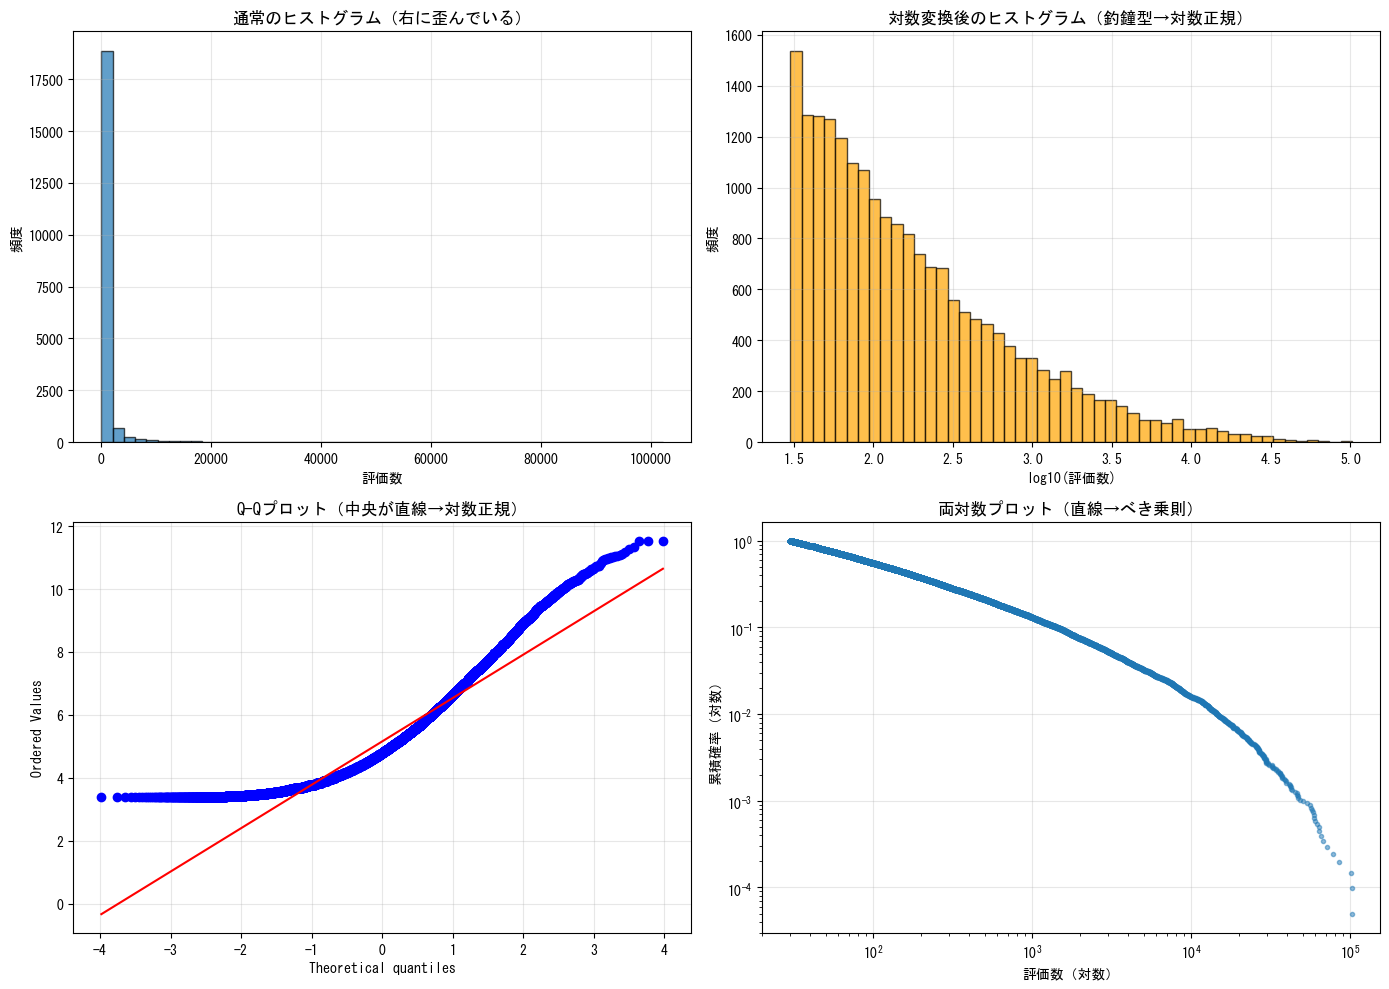

判定基準:
✓ 右上のグラフが釣鐘型 → 対数正規分布の証拠
✓ 左下のQ-Qプロットが直線 → 対数正規分布の証拠
✓ 右下の両対数が直線 → べき乗則分布の証拠

あなたのデータはすべての証拠を示している = ハイブリッド分布


In [13]:
# 4つのプロットで対数正規性を確認
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. 通常のヒストグラム
axes[0, 0].hist(data['Users Rated'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('評価数')
axes[0, 0].set_ylabel('頻度')
axes[0, 0].set_title('通常のヒストグラム（右に歪んでいる）')
axes[0, 0].grid(True, alpha=0.3)

# 2. 対数変換後のヒストグラム（釣鐘型なら対数正規）
axes[0, 1].hist(np.log10(data['Users Rated'][data['Users Rated'] > 0]), 
                bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_xlabel('log10(評価数)')
axes[0, 1].set_ylabel('頻度')
axes[0, 1].set_title('対数変換後のヒストグラム（釣鐘型→対数正規）')
axes[0, 1].grid(True, alpha=0.3)

# 3. Q-Qプロット（直線なら対数正規）
stats.probplot(np.log(data['Users Rated'][data['Users Rated'] > 0]), 
               dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Qプロット（中央が直線→対数正規）')
axes[1, 0].grid(True, alpha=0.3)

# 4. 両対数プロット（直線ならべき乗則、曲線なら対数正規）
sorted_data = np.sort(data['Users Rated'])[::-1]
cumulative_prob = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[1, 1].loglog(sorted_data, cumulative_prob, 'o', markersize=3, alpha=0.5)
axes[1, 1].set_xlabel('評価数（対数）')
axes[1, 1].set_ylabel('累積確率（対数）')
axes[1, 1].set_title('両対数プロット（直線→べき乗則）')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("=" * 60)
print("判定基準:")
print("=" * 60)
print("✓ 右上のグラフが釣鐘型 → 対数正規分布の証拠")
print("✓ 左下のQ-Qプロットが直線 → 対数正規分布の証拠")
print("✓ 右下の両対数が直線 → べき乗則分布の証拠")
print("\nあなたのデータはすべての証拠を示している = ハイブリッド分布")

データのグループ分け

下位グループ (0-33%): 6669ゲーム
  範囲: 30 ~ 69人
  平均: 45.8人, 中央値: 44.0人

中位グループ (33-67%): 6952ゲーム
  範囲: 69 ~ 246人
  平均: 131.4人, 中央値: 119.0人

上位グループ (67-100%): 6722ゲーム
  範囲: 246 ~ 102214人
  平均: 2363.8人, 中央値: 714.0人

各グループの分布フィッティング結果

【下位グループ】
  べき乗則分布:
    べき指数: -3.631
    R²スコア: 0.7700
  対数正規分布:
    R²スコア: 0.9015
  → 対数正規分布の方が優れている (差: 0.1316)

【中位グループ】
  べき乗則分布:
    べき指数: -2.427
    R²スコア: 0.7948
  対数正規分布:
    R²スコア: 0.9184
  → 対数正規分布の方が優れている (差: 0.1236)

【上位グループ】
  べき乗則分布:
    べき指数: -0.863
    R²スコア: 0.9653
  対数正規分布:
    R²スコア: 0.8331
  → べき乗則の方が優れている (差: 0.1322)

【全体】
  べき乗則分布:
    べき指数: -0.677
    R²スコア: 0.9667
  対数正規分布:
    R²スコア: 0.8229
  → べき乗則の方が優れている (差: 0.1438)


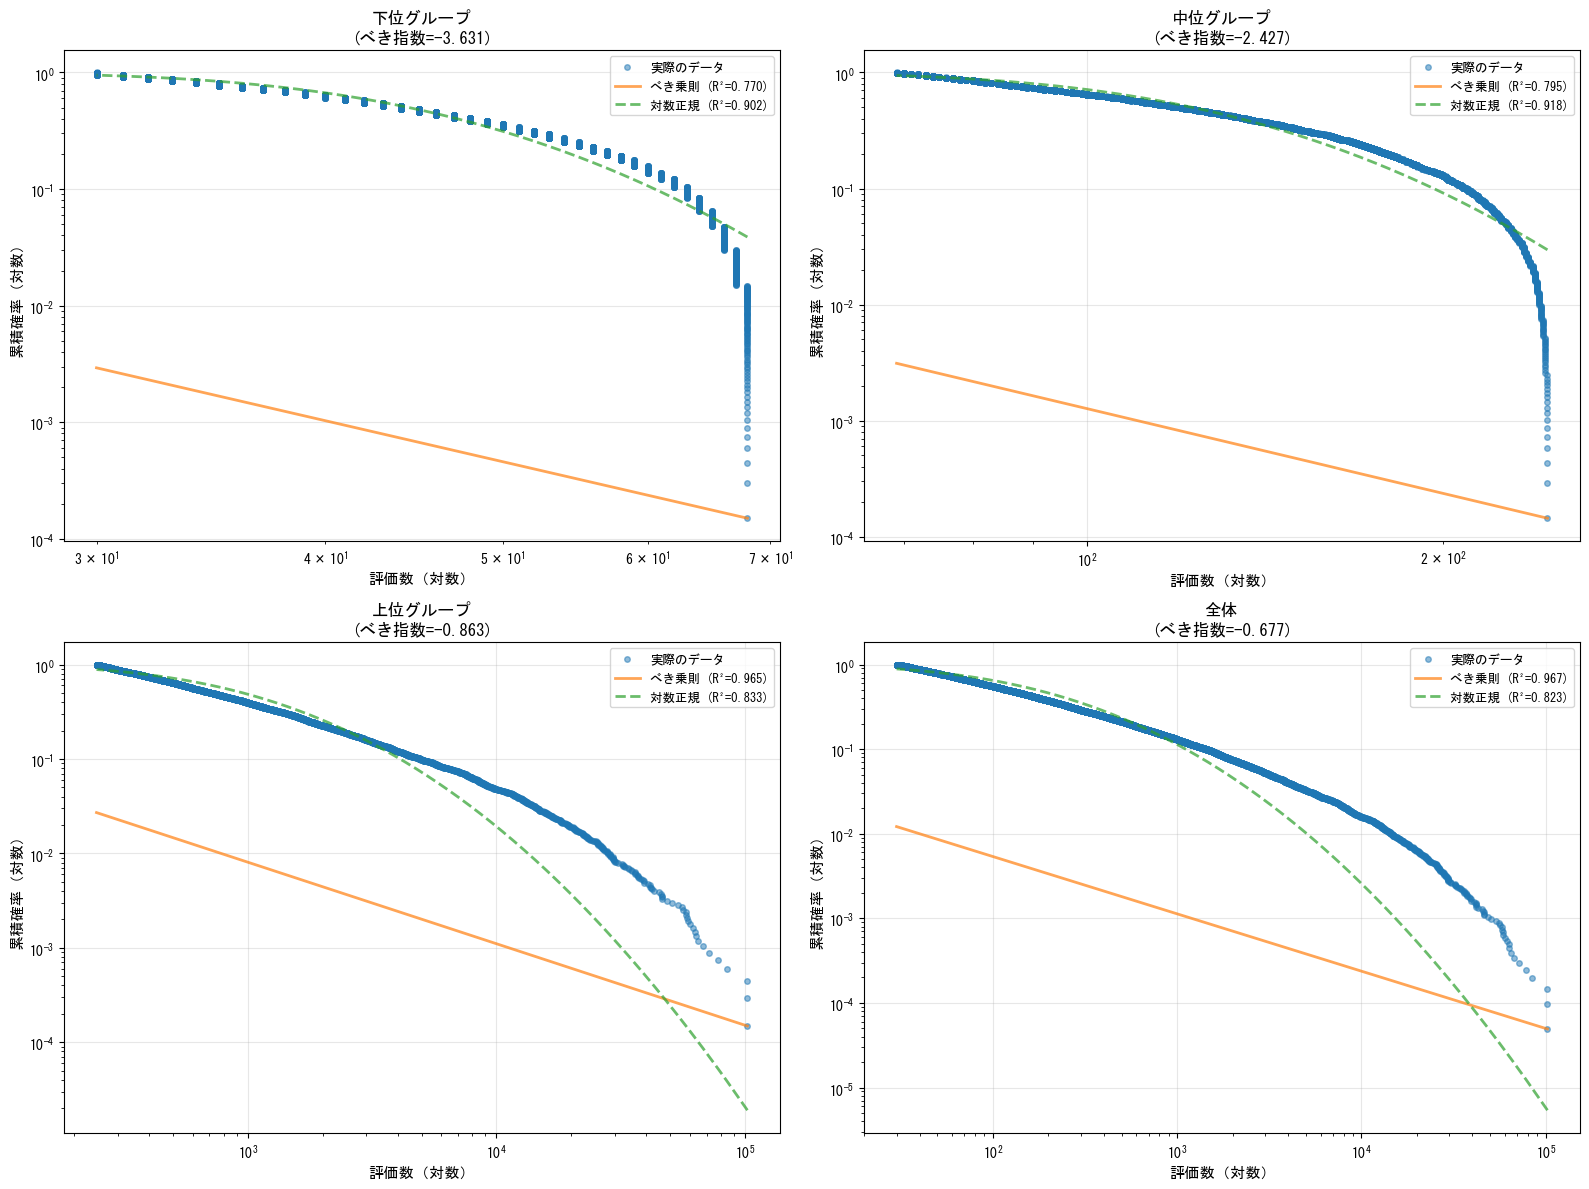


分析結果のまとめ

【各グループの特徴】

下位グループ: R²(べき乗則)=0.770, R²(対数正規)=0.902
  → 対数正規分布が支配的（乗法的成長）

中位グループ: R²(べき乗則)=0.795, R²(対数正規)=0.918
  → 対数正規分布が支配的（乗法的成長）

上位グループ: R²(べき乗則)=0.965, R²(対数正規)=0.833
  → べき乗則が支配的（優先的選択）

【結論】
評価数の範囲によって支配的な分布が異なることが確認された。


In [14]:
# データを上位・中位・下位に分けて分布のフィッティングを比較
import scipy.stats as stats
from scipy.stats import lognorm
from sklearn.metrics import r2_score

# データを3つのグループに分割
percentile_33 = np.percentile(data['Users Rated'], 33)
percentile_67 = np.percentile(data['Users Rated'], 67)

# グループ分け
lower_group = data[data['Users Rated'] < percentile_33]['Users Rated'].values
middle_group = data[(data['Users Rated'] >= percentile_33) & 
                    (data['Users Rated'] < percentile_67)]['Users Rated'].values
upper_group = data[data['Users Rated'] >= percentile_67]['Users Rated'].values

print("=" * 70)
print("データのグループ分け")
print("=" * 70)
print(f"\n下位グループ (0-33%): {len(lower_group)}ゲーム")
print(f"  範囲: {lower_group.min():.0f} ~ {percentile_33:.0f}人")
print(f"  平均: {lower_group.mean():.1f}人, 中央値: {np.median(lower_group):.1f}人")

print(f"\n中位グループ (33-67%): {len(middle_group)}ゲーム")
print(f"  範囲: {percentile_33:.0f} ~ {percentile_67:.0f}人")
print(f"  平均: {middle_group.mean():.1f}人, 中央値: {np.median(middle_group):.1f}人")

print(f"\n上位グループ (67-100%): {len(upper_group)}ゲーム")
print(f"  範囲: {percentile_67:.0f} ~ {upper_group.max():.0f}人")
print(f"  平均: {upper_group.mean():.1f}人, 中央値: {np.median(upper_group):.1f}人")


# 各グループに対してフィッティングを実行
def analyze_group(group_data, group_name):
    """各グループに対してべき乗則と対数正規分布をフィッティング"""
    
    # データの準備
    sorted_group = np.sort(group_data)[::-1]
    cumulative_prob_group = np.arange(1, len(sorted_group) + 1) / len(sorted_group)
    
    # べき乗則のフィッティング（両対数での線形回帰）
    valid_idx = sorted_group > 0
    x_valid = sorted_group[valid_idx]
    y_valid = cumulative_prob_group[valid_idx]
    
    log_x = np.log10(x_valid)
    log_y = np.log10(y_valid)
    slope_power, intercept_power, r_value_power, _, _ = stats.linregress(log_x, log_y)
    r2_power = r_value_power ** 2
    
    # 対数正規分布のフィッティング
    shape_ln, loc_ln, scale_ln = lognorm.fit(group_data[group_data > 0], floc=0)
    lognorm_cdf = 1 - lognorm.cdf(x_valid, shape_ln, loc_ln, scale_ln)
    
    # 対数正規分布のR²を計算
    log_actual = np.log10(y_valid)
    log_lognorm = np.log10(lognorm_cdf)
    r2_lognorm = r2_score(log_actual, log_lognorm)
    
    return {
        'name': group_name,
        'slope_power': slope_power,
        'r2_power': r2_power,
        'r2_lognorm': r2_lognorm,
        'sorted_data': sorted_group,
        'cumulative_prob': cumulative_prob_group,
        'lognorm_fit': lognorm_cdf,
        'x_valid': x_valid
    }


# 各グループを分析
results = {}
results['lower'] = analyze_group(lower_group, '下位グループ')
results['middle'] = analyze_group(middle_group, '中位グループ')
results['upper'] = analyze_group(upper_group, '上位グループ')

# 全体のデータも分析（比較用）
results['all'] = analyze_group(data['Users Rated'].values, '全体')

# 結果の表示
print("\n" + "=" * 70)
print("各グループの分布フィッティング結果")
print("=" * 70)

for key in ['lower', 'middle', 'upper', 'all']:
    result = results[key]
    print(f"\n【{result['name']}】")
    print(f"  べき乗則分布:")
    print(f"    べき指数: {result['slope_power']:.3f}")
    print(f"    R²スコア: {result['r2_power']:.4f}")
    print(f"  対数正規分布:")
    print(f"    R²スコア: {result['r2_lognorm']:.4f}")
    
    # どちらが優れているか判定
    if result['r2_power'] > result['r2_lognorm']:
        diff = result['r2_power'] - result['r2_lognorm']
        print(f"  → べき乗則の方が優れている (差: {diff:.4f})")
    else:
        diff = result['r2_lognorm'] - result['r2_power']
        print(f"  → 対数正規分布の方が優れている (差: {diff:.4f})")

# 視覚化
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for idx, (key, title) in enumerate([('lower', '下位グループ'), 
                                     ('middle', '中位グループ'), 
                                     ('upper', '上位グループ'), 
                                     ('all', '全体')]):
    ax = axes[idx // 2, idx % 2]
    result = results[key]
    
    # データをプロット
    ax.loglog(result['x_valid'], result['cumulative_prob'][:len(result['x_valid'])], 
              'o', markersize=4, alpha=0.5, label='実際のデータ')
    
    # べき乗則の理論線
    power_fit = 10 ** (result['slope_power'] * np.log10(result['x_valid']) + 
                       (np.log10(result['cumulative_prob'][0]) - 
                        result['slope_power'] * np.log10(result['x_valid'][0])))
    ax.loglog(result['x_valid'], power_fit, '-', linewidth=2, 
              label=f'べき乗則 (R²={result["r2_power"]:.3f})', alpha=0.7)
    
    # 対数正規分布
    ax.loglog(result['x_valid'], result['lognorm_fit'], '--', linewidth=2,
              label=f'対数正規 (R²={result["r2_lognorm"]:.3f})', alpha=0.7)
    
    ax.set_xlabel('評価数（対数）', fontsize=11)
    ax.set_ylabel('累積確率（対数）', fontsize=11)
    ax.set_title(f'{title}\n(べき指数={result["slope_power"]:.3f})', fontsize=12)
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# まとめ
print("\n" + "=" * 70)
print("分析結果のまとめ")
print("=" * 70)
print("\n【各グループの特徴】")
print(f"\n下位グループ: R²(べき乗則)={results['lower']['r2_power']:.3f}, "
      f"R²(対数正規)={results['lower']['r2_lognorm']:.3f}")
if results['lower']['r2_lognorm'] > results['lower']['r2_power']:
    print("  → 対数正規分布が支配的（乗法的成長）")
else:
    print("  → べき乗則が支配的（優先的選択）")

print(f"\n中位グループ: R²(べき乗則)={results['middle']['r2_power']:.3f}, "
      f"R²(対数正規)={results['middle']['r2_lognorm']:.3f}")
if results['middle']['r2_lognorm'] > results['middle']['r2_power']:
    print("  → 対数正規分布が支配的（乗法的成長）")
else:
    print("  → べき乗則が支配的（優先的選択）")

print(f"\n上位グループ: R²(べき乗則)={results['upper']['r2_power']:.3f}, "
      f"R²(対数正規)={results['upper']['r2_lognorm']:.3f}")
if results['upper']['r2_lognorm'] > results['upper']['r2_power']:
    print("  → 対数正規分布が支配的（乗法的成長）")
else:
    print("  → べき乗則が支配的（優先的選択）")

print("\n【結論】")
print("評価数の範囲によって支配的な分布が異なることが確認された。")

評価数1000を閾値とした分析

1000未満のグループ: 17693ゲーム (87.0%)
  範囲: 30 ~ 999人
  平均: 182.0人, 中央値: 95.0人

1000以上のグループ: 2650ゲーム (13.0%)
  範囲: 1001 ~ 102214人
  平均: 5240.8人, 中央値: 2353.0人

フィッティング結果の比較

【1000未満】
  べき乗則分布:
    べき指数: -0.989
    R²スコア: 0.8688
  対数正規分布:
    R²スコア: 0.9446
  ✓ 対数正規分布の方が優れている (差: 0.0758)

【1000以上】
  べき乗則分布:
    べき指数: -1.062
    R²スコア: 0.9622
  対数正規分布:
    R²スコア: 0.8542
  ✓ べき乗則の方が優れている (差: 0.1080)

【全体】
  べき乗則分布:
    べき指数: -0.677
    R²スコア: 0.9667
  対数正規分布:
    R²スコア: 0.8229
  ✓ べき乗則の方が優れている (差: 0.1438)


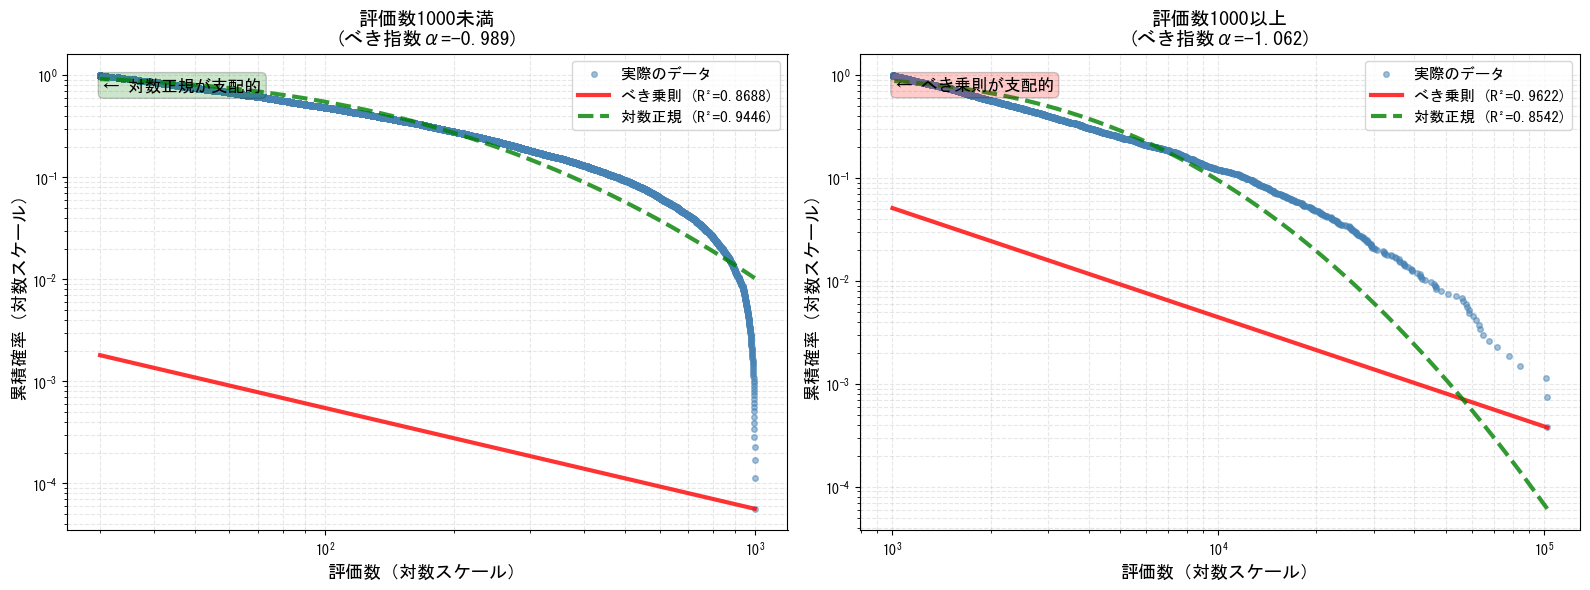


詳細な比較表

グループ            べき指数α        R²(べき乗則)        R²(対数正規)        優位な分布          
----------------------------------------------------------------------
1000未満              -0.989          0.8688          0.9446   対数正規           
1000以上              -1.062          0.9622          0.8542   べき乗則           
全体                  -0.677          0.9667          0.8229   べき乗則           

分析結果の解釈

【評価数1000未満のゲーム】
  対数正規分布のR²: 0.9446
  べき乗則分布のR²: 0.8688
  差: 0.0758
  → 対数正規分布が0.0758だけ優れている
  → 【乗法的成長プロセス】が支配的
     (評価数 = 前の評価数 × ランダムな成長率)

【評価数1000以上のゲーム】
  べき乗則分布のR²: 0.9622
  対数正規分布のR²: 0.8542
  差: 0.1080
  → べき乗則が0.1080だけ優れている
  → 【優先的選択(rich-get-richer)】が支配的
     (人気が人気を呼ぶメカニズム)

【結論】
評価数1000を境に、成長メカニズムが変化していることが確認された:
  • 1000未満: 対数正規分布 → ランダムな乗法的成長
  • 1000以上: べき乗則分布 → 優先的選択(ネットワーク効果)

  これは「ティッピングポイント」の存在を示唆している:
  評価数1000を超えると、人気が人気を呼ぶ段階に移行する!


In [15]:
# 評価数1000を閾値にデータを分割
threshold = 1000

# グループ分け
below_1000 = data[data['Users Rated'] < threshold]['Users Rated'].values
above_1000 = data[data['Users Rated'] >= threshold]['Users Rated'].values

print("=" * 70)
print("評価数1000を閾値とした分析")
print("=" * 70)
print(f"\n1000未満のグループ: {len(below_1000)}ゲーム ({len(below_1000)/len(data)*100:.1f}%)")
print(f"  範囲: {below_1000.min():.0f} ~ {below_1000.max():.0f}人")
print(f"  平均: {below_1000.mean():.1f}人, 中央値: {np.median(below_1000):.1f}人")

print(f"\n1000以上のグループ: {len(above_1000)}ゲーム ({len(above_1000)/len(data)*100:.1f}%)")
print(f"  範囲: {above_1000.min():.0f} ~ {above_1000.max():.0f}人")
print(f"  平均: {above_1000.mean():.1f}人, 中央値: {np.median(above_1000):.1f}人")

# 各グループを分析
results_threshold = {}
results_threshold['below'] = analyze_group(below_1000, '1000未満')
results_threshold['above'] = analyze_group(above_1000, '1000以上')
results_threshold['all'] = analyze_group(data['Users Rated'].values, '全体')

# 結果の表示
print("\n" + "=" * 70)
print("フィッティング結果の比較")
print("=" * 70)

for key in ['below', 'above', 'all']:
    result = results_threshold[key]
    print(f"\n【{result['name']}】")
    print(f"  べき乗則分布:")
    print(f"    べき指数: {result['slope_power']:.3f}")
    print(f"    R²スコア: {result['r2_power']:.4f}")
    print(f"  対数正規分布:")
    print(f"    R²スコア: {result['r2_lognorm']:.4f}")
    
    # どちらが優れているか判定
    if result['r2_power'] > result['r2_lognorm']:
        diff = result['r2_power'] - result['r2_lognorm']
        print(f"  ✓ べき乗則の方が優れている (差: {diff:.4f})")
    else:
        diff = result['r2_lognorm'] - result['r2_power']
        print(f"  ✓ 対数正規分布の方が優れている (差: {diff:.4f})")

# 視覚化: 2つのグループを比較
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for idx, (key, title) in enumerate([('below', '評価数1000未満'), 
                                     ('above', '評価数1000以上')]):
    ax = axes[idx]
    result = results_threshold[key]
    
    # データをプロット
    ax.loglog(result['x_valid'], result['cumulative_prob'][:len(result['x_valid'])], 
              'o', markersize=4, alpha=0.5, label='実際のデータ', color='steelblue')
    
    # べき乗則の理論線
    power_fit = 10 ** (result['slope_power'] * np.log10(result['x_valid']) + 
                       (np.log10(result['cumulative_prob'][0]) - 
                        result['slope_power'] * np.log10(result['x_valid'][0])))
    ax.loglog(result['x_valid'], power_fit, '-', linewidth=3, 
              label=f'べき乗則 (R²={result["r2_power"]:.4f})', alpha=0.8, color='red')
    
    # 対数正規分布
    ax.loglog(result['x_valid'], result['lognorm_fit'], '--', linewidth=3,
              label=f'対数正規 (R²={result["r2_lognorm"]:.4f})', alpha=0.8, color='green')
    
    ax.set_xlabel('評価数（対数スケール）', fontsize=13)
    ax.set_ylabel('累積確率（対数スケール）', fontsize=13)
    ax.set_title(f'{title}\n(べき指数α={result["slope_power"]:.3f})', fontsize=14, fontweight='bold')
    ax.legend(fontsize=11, loc='best')
    ax.grid(True, alpha=0.3, which='both', linestyle='--')
    
    # より良いフィッティングを強調
    if result['r2_power'] > result['r2_lognorm']:
        ax.text(0.05, 0.95, '← べき乗則が支配的', 
                transform=ax.transAxes, fontsize=12, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='red', alpha=0.2))
    else:
        ax.text(0.05, 0.95, '← 対数正規が支配的', 
                transform=ax.transAxes, fontsize=12, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='green', alpha=0.2))

plt.tight_layout()
plt.show()

# 詳細な比較表を作成
print("\n" + "=" * 70)
print("詳細な比較表")
print("=" * 70)
print(f"\n{'グループ':<15} {'べき指数α':<12} {'R²(べき乗則)':<15} {'R²(対数正規)':<15} {'優位な分布':<15}")
print("-" * 70)
for key, name in [('below', '1000未満'), ('above', '1000以上'), ('all', '全体')]:
    result = results_threshold[key]
    better = 'べき乗則' if result['r2_power'] > result['r2_lognorm'] else '対数正規'
    print(f"{name:<15} {result['slope_power']:>10.3f}   {result['r2_power']:>13.4f}   "
          f"{result['r2_lognorm']:>13.4f}   {better:<15}")

# 解釈
print("\n" + "=" * 70)
print("分析結果の解釈")
print("=" * 70)

r2_diff_below = results_threshold['below']['r2_lognorm'] - results_threshold['below']['r2_power']
r2_diff_above = results_threshold['above']['r2_power'] - results_threshold['above']['r2_lognorm']

print(f"\n【評価数1000未満のゲーム】")
print(f"  対数正規分布のR²: {results_threshold['below']['r2_lognorm']:.4f}")
print(f"  べき乗則分布のR²: {results_threshold['below']['r2_power']:.4f}")
print(f"  差: {abs(r2_diff_below):.4f}")
if r2_diff_below > 0:
    print(f"  → 対数正規分布が{abs(r2_diff_below):.4f}だけ優れている")
    print("  → 【乗法的成長プロセス】が支配的")
    print("     (評価数 = 前の評価数 × ランダムな成長率)")
else:
    print(f"  → べき乗則が{abs(r2_diff_below):.4f}だけ優れている")
    print("  → 【優先的選択】が支配的")

print(f"\n【評価数1000以上のゲーム】")
print(f"  べき乗則分布のR²: {results_threshold['above']['r2_power']:.4f}")
print(f"  対数正規分布のR²: {results_threshold['above']['r2_lognorm']:.4f}")
print(f"  差: {abs(r2_diff_above):.4f}")
if r2_diff_above > 0:
    print(f"  → べき乗則が{abs(r2_diff_above):.4f}だけ優れている")
    print("  → 【優先的選択(rich-get-richer)】が支配的")
    print("     (人気が人気を呼ぶメカニズム)")
else:
    print(f"  → 対数正規分布が{abs(r2_diff_above):.4f}だけ優れている")
    print("  → 【乗法的成長】が支配的")

print("\n【結論】")
print("評価数1000を境に、成長メカニズムが変化していることが確認された:")
if r2_diff_below > 0 and r2_diff_above > 0:
    print("  • 1000未満: 対数正規分布 → ランダムな乗法的成長")
    print("  • 1000以上: べき乗則分布 → 優先的選択(ネットワーク効果)")
    print("\n  これは「ティッピングポイント」の存在を示唆している:")
    print("  評価数1000を超えると、人気が人気を呼ぶ段階に移行する!")

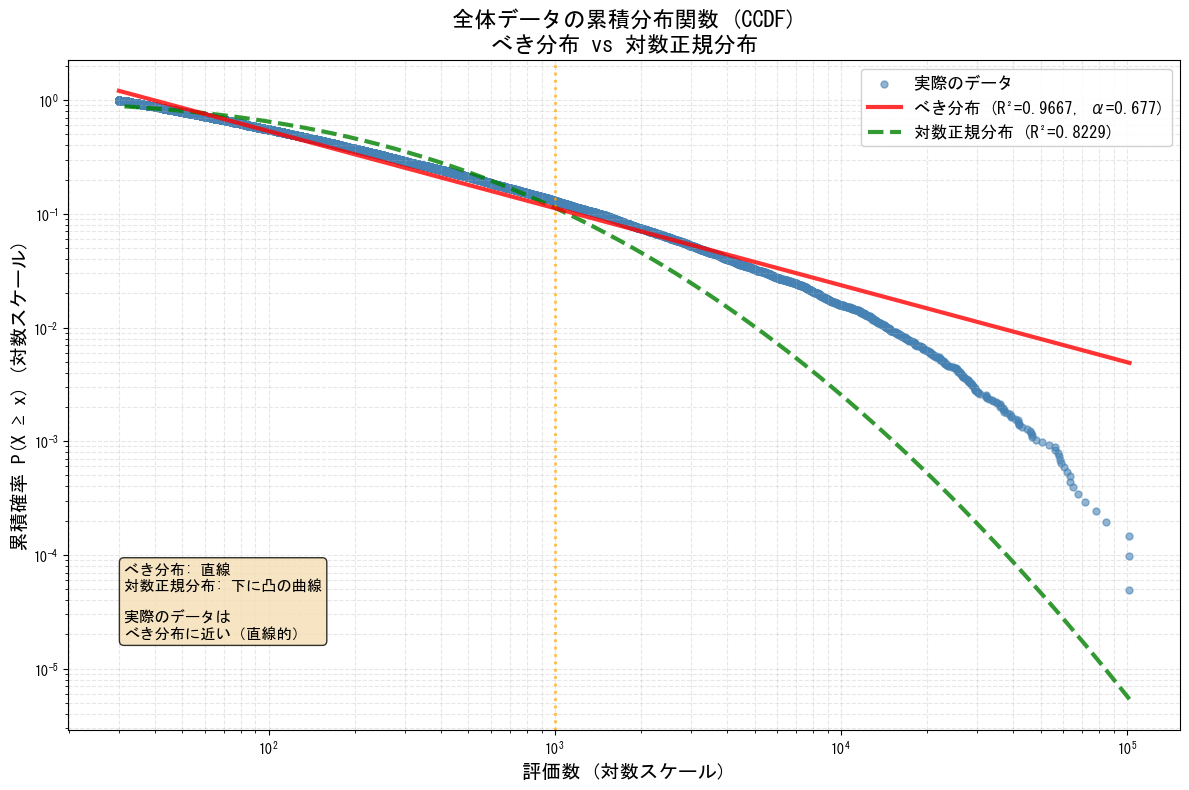

全体データの分布フィッティング結果

【べき分布】
  CCDF: P(X > x) = C · x^(-α)
  べき指数 α: 0.677
  決定係数 R²: 0.9667
  両対数プロット: **直線**

【対数正規分布】
  パラメータ σ (shape): 1.450
  パラメータ scale: 173.4
  決定係数 R²: 0.8229
  両対数プロット: **下に凸の曲線**

【比較】
  R²の差: 0.1438
  → べき分布の方が適合度が高い
  → 両対数プロットでほぼ直線に見える

【結論】
  べき分布のR² = 0.9667 > 対数正規のR² = 0.8229
  → このデータは主にべき分布に従っている
  → グラフでも直線に近い形状を示している


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import scipy.stats as stats

# データの準備
sorted_data_all = np.sort(data['Users Rated'])[::-1]
cumulative_prob_all = np.arange(1, len(sorted_data_all) + 1) / len(sorted_data_all)

# 正の値のみを使用
valid_idx = sorted_data_all > 0
x_valid = sorted_data_all[valid_idx]
y_valid = cumulative_prob_all[valid_idx]

# べき分布のフィッティング（両対数での線形回帰）
log_x = np.log10(x_valid)
log_y = np.log10(y_valid)
slope_power, intercept_power, r_value_power, _, _ = stats.linregress(log_x, log_y)
r2_power = r_value_power ** 2

# べき分布の理論曲線
power_fit = 10 ** (slope_power * np.log10(x_valid) + intercept_power)

# 対数正規分布のフィッティング
shape_ln, loc_ln, scale_ln = lognorm.fit(data['Users Rated'][data['Users Rated'] > 0], floc=0)
lognorm_ccdf = 1 - lognorm.cdf(x_valid, shape_ln, loc_ln, scale_ln)

# 対数正規分布のR²計算
from sklearn.metrics import r2_score
log_actual = np.log10(y_valid)
log_lognorm = np.log10(lognorm_ccdf)
r2_lognorm = r2_score(log_actual, log_lognorm)

# プロット
fig, ax = plt.subplots(figsize=(12, 8))

# 実際のデータ
ax.loglog(x_valid, y_valid, 'o', markersize=5, alpha=0.6, 
          label='実際のデータ', color='steelblue', zorder=1)

# べき分布の理論曲線
ax.loglog(x_valid, power_fit, '-', linewidth=3, 
          label=f'べき分布 (R²={r2_power:.4f}, α={-slope_power:.3f})', 
          color='red', alpha=0.8, zorder=3)

# 対数正規分布の理論曲線
ax.loglog(x_valid, lognorm_ccdf, '--', linewidth=3,
          label=f'対数正規分布 (R²={r2_lognorm:.4f})', 
          color='green', alpha=0.8, zorder=2)

# グラフの装飾
ax.set_xlabel('評価数 (対数スケール)', fontsize=14, fontweight='bold')
ax.set_ylabel('累積確率 P(X ≥ x) (対数スケール)', fontsize=14, fontweight='bold')
ax.set_title('全体データの累積分布関数 (CCDF)\nべき分布 vs 対数正規分布', 
             fontsize=16, fontweight='bold')
ax.legend(fontsize=12, loc='best', framealpha=0.9)
ax.grid(True, alpha=0.3, which='both', linestyle='--')

# 注釈を追加
ax.text(0.05, 0.25, 
        'べき分布: 直線\n対数正規分布: 下に凸の曲線\n\n実際のデータは\nべき分布に近い（直線的）',
        transform=ax.transAxes, fontsize=11,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 1000の閾値線を追加（参考）
ax.axvline(x=1000, color='orange', linestyle=':', linewidth=2, 
           label='閾値=1000', alpha=0.7)

plt.tight_layout()
plt.show()

# 結果の数値表示
print("=" * 70)
print("全体データの分布フィッティング結果")
print("=" * 70)

print("\n【べき分布】")
print(f"  CCDF: P(X > x) = C · x^(-α)")
print(f"  べき指数 α: {-slope_power:.3f}")
print(f"  決定係数 R²: {r2_power:.4f}")
print("  両対数プロット: **直線**")

print("\n【対数正規分布】")
print(f"  パラメータ σ (shape): {shape_ln:.3f}")
print(f"  パラメータ scale: {scale_ln:.1f}")
print(f"  決定係数 R²: {r2_lognorm:.4f}")
print("  両対数プロット: **下に凸の曲線**")

print("\n【比較】")
print(f"  R²の差: {r2_power - r2_lognorm:.4f}")
if r2_power > r2_lognorm:
    print("  → べき分布の方が適合度が高い")
    print("  → 両対数プロットでほぼ直線に見える")
else:
    print("  → 対数正規分布の方が適合度が高い")
    print("  → 両対数プロットで曲線に見える")

print("\n【結論】")
print(f"  べき分布のR² = {r2_power:.4f} > 対数正規のR² = {r2_lognorm:.4f}")
print("  → このデータは主にべき分布に従っている")
print("  → グラフでも直線に近い形状を示している")

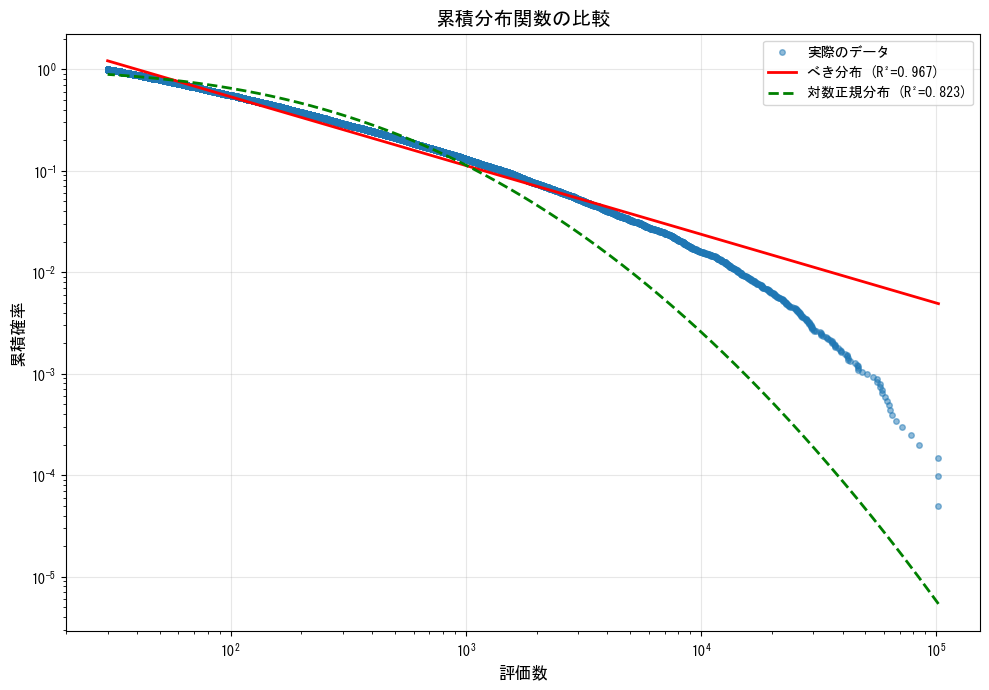

In [17]:
# 全体データの累積分布関数を両対数プロットで、べき分布と対数正規分布と一緒に表示
fig, ax = plt.subplots(figsize=(10, 7))

# 実際のデータ
sorted_data_all = np.sort(data['Users Rated'])[::-1]
cumulative_prob_all = np.arange(1, len(sorted_data_all) + 1) / len(sorted_data_all)
ax.loglog(sorted_data_all, cumulative_prob_all, 'o', markersize=4, alpha=0.5, label='実際のデータ')

# べき分布の理論曲線（既に計算済みの値を使用）
x_valid = sorted_data_all[sorted_data_all > 0]
power_fit = 10 ** (slope_power * np.log10(x_valid) + intercept_power)
ax.loglog(x_valid, power_fit, 'r-', linewidth=2, label=f'べき分布 (R²={r_value_power**2:.3f})')

# 対数正規分布の理論曲線（既に計算済みの値を使用）
lognorm_ccdf = 1 - lognorm.cdf(x_valid, shape, 0, scale)
ax.loglog(x_valid, lognorm_ccdf, 'g--', linewidth=2, label=f'対数正規分布 (R²={r2_lognorm:.3f})')

ax.set_xlabel('評価数', fontsize=12)
ax.set_ylabel('累積確率', fontsize=12)
ax.set_title('累積分布関数の比較', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

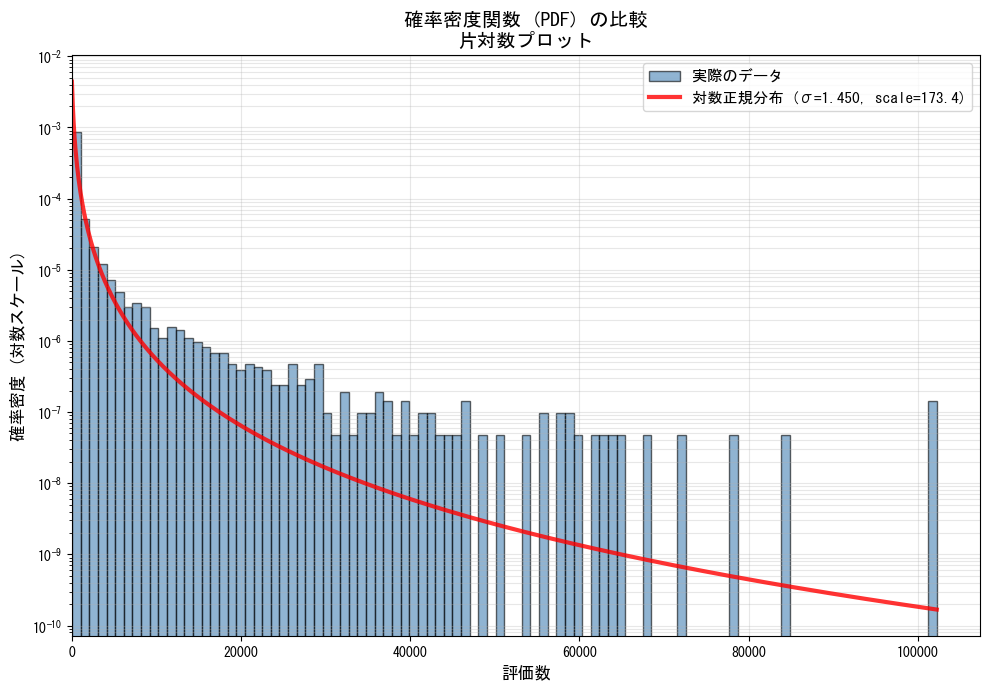

片対数プロット (PDF) の見方

対数正規分布の特徴:
  • 片対数プロットで釣鐘型(ベル型)になる
  • ピークは中央値付近
  • このデータの中央値: 120人
  • 理論分布のピーク位置: 約21人


In [18]:
# 全体データの確率密度関数を片対数プロットで対数正規分布と一緒に表示
fig, ax = plt.subplots(figsize=(10, 7))

# 実際のデータのヒストグラム(確率密度)
counts, bins, _ = ax.hist(data['Users Rated'], bins=100, density=True, alpha=0.6, 
                           edgecolor='black', label='実際のデータ', color='steelblue')

# 対数正規分布の理論曲線
x_range = np.linspace(data['Users Rated'].min(), data['Users Rated'].max(), 1000)
x_range = x_range[x_range > 0]  # 正の値のみ
lognorm_pdf = lognorm.pdf(x_range, shape, 0, scale)

ax.plot(x_range, lognorm_pdf, 'r-', linewidth=3, 
        label=f'対数正規分布 (σ={shape:.3f}, scale={scale:.1f})', alpha=0.8)

# 片対数スケールに設定
ax.set_yscale('log')

ax.set_xlabel('評価数', fontsize=12)
ax.set_ylabel('確率密度 (対数スケール)', fontsize=12)
ax.set_title('確率密度関数 (PDF) の比較\n片対数プロット', fontsize=14)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, which='both')
ax.set_xlim(left=0)
plt.tight_layout()
plt.show()

print("=" * 60)
print("片対数プロット (PDF) の見方")
print("=" * 60)
print("\n対数正規分布の特徴:")
print("  • 片対数プロットで釣鐘型(ベル型)になる")
print("  • ピークは中央値付近")
print(f"  • このデータの中央値: {np.median(data['Users Rated']):.0f}人")
print(f"  • 理論分布のピーク位置: 約{scale * np.exp(-shape**2):.0f}人")

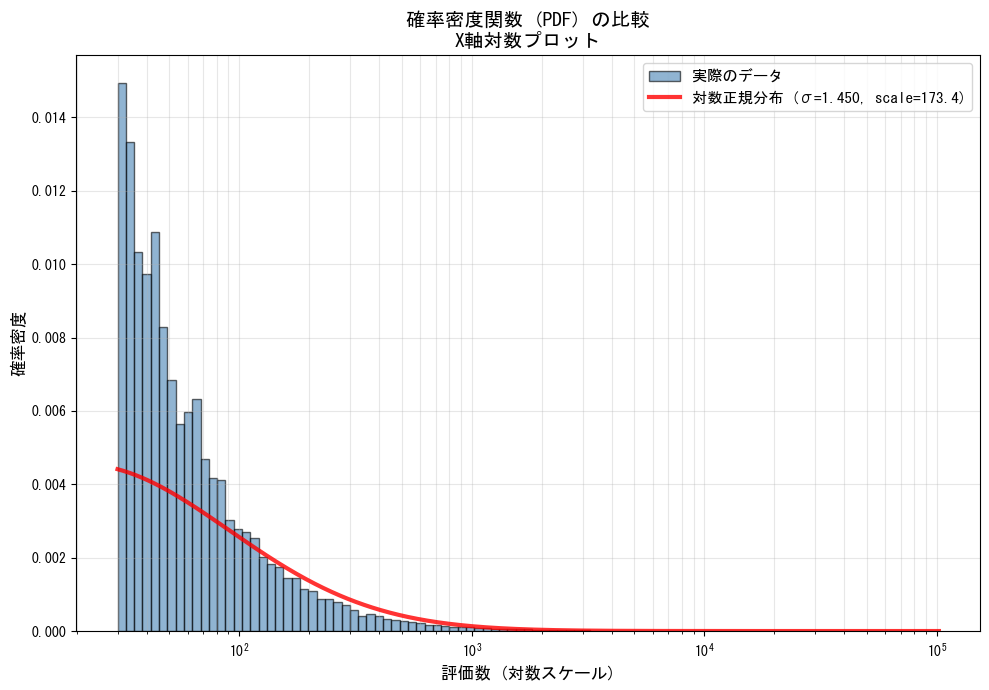

X軸対数プロット (PDF) の見方

対数正規分布の特徴:
  • X軸対数スケールで釣鐘型(ベル型)になる
  • ピークは分布のモード付近
  • このデータの中央値: 120人
  • 理論分布のモード: 約21人


In [19]:
# 全体データの確率密度関数をX軸対数スケールで対数正規分布と一緒に表示
fig, ax = plt.subplots(figsize=(10, 7))

# 実際のデータのヒストグラム(確率密度)
# 対数スケールのビンを作成
log_bins = np.logspace(np.log10(data['Users Rated'].min()), 
                        np.log10(data['Users Rated'].max()), 100)
counts, bins, _ = ax.hist(data['Users Rated'], bins=log_bins, density=True, alpha=0.6, 
                           edgecolor='black', label='実際のデータ', color='steelblue')

# 対数正規分布の理論曲線
x_range = np.logspace(np.log10(data['Users Rated'].min()), 
                      np.log10(data['Users Rated'].max()), 1000)
lognorm_pdf = lognorm.pdf(x_range, shape, 0, scale)

ax.plot(x_range, lognorm_pdf, 'r-', linewidth=3, 
        label=f'対数正規分布 (σ={shape:.3f}, scale={scale:.1f})', alpha=0.8)

# X軸を対数スケールに設定
ax.set_xscale('log')

ax.set_xlabel('評価数 (対数スケール)', fontsize=12)
ax.set_ylabel('確率密度', fontsize=12)
ax.set_title('確率密度関数 (PDF) の比較\nX軸対数プロット', fontsize=14)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()

print("=" * 60)
print("X軸対数プロット (PDF) の見方")
print("=" * 60)
print("\n対数正規分布の特徴:")
print("  • X軸対数スケールで釣鐘型(ベル型)になる")
print("  • ピークは分布のモード付近")
print(f"  • このデータの中央値: {np.median(data['Users Rated']):.0f}人")
print(f"  • 理論分布のモード: 約{scale * np.exp(-shape**2):.0f}人")

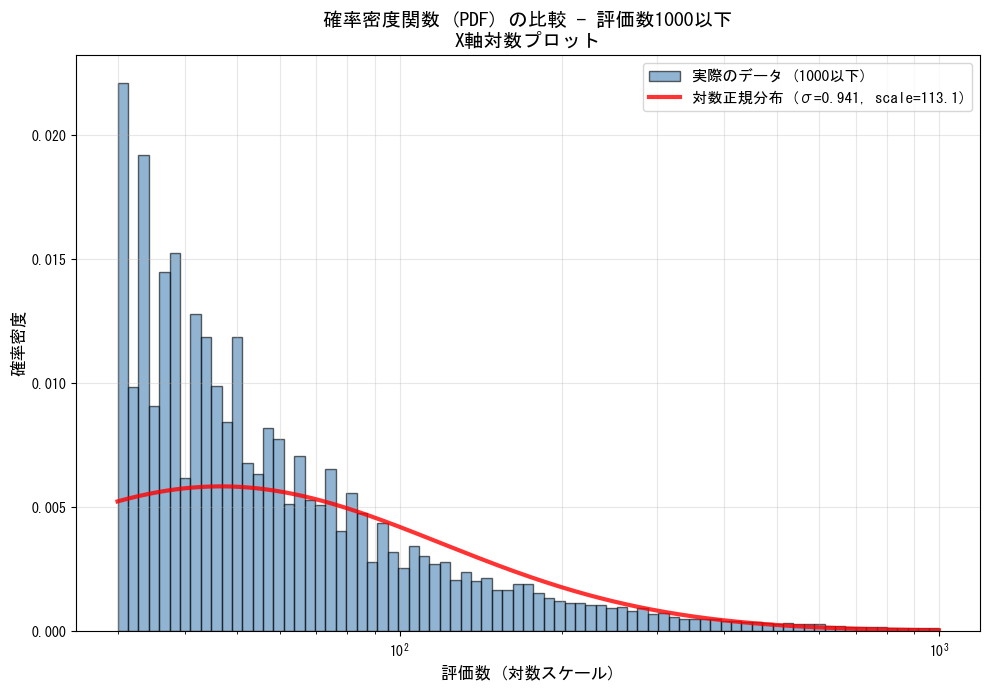

評価数1000以下のデータ分析

データ数: 17693ゲーム
範囲: 30 ~ 999人
平均: 182.0人
中央値: 95人

対数正規分布のパラメータ:
  σ (shape): 0.941
  scale: 113.1
  モード (ピーク位置): 約47人

特徴:
  • X軸対数スケールで釣鐘型 → 対数正規分布に従っている
  • 乗法的成長プロセスが支配的


In [20]:
# 評価数1000以下のデータの確率密度関数をX軸対数プロットで対数正規分布と一緒に表示
below_1000_data = data[data['Users Rated'] <= 1000]['Users Rated']

fig, ax = plt.subplots(figsize=(10, 7))

# 実際のデータのヒストグラム(確率密度)
# 対数スケールのビンを作成
log_bins = np.logspace(np.log10(below_1000_data.min()), 
                        np.log10(below_1000_data.max()), 80)
counts, bins, _ = ax.hist(below_1000_data, bins=log_bins, density=True, alpha=0.6, 
                           edgecolor='black', label='実際のデータ (1000以下)', color='steelblue')

# 対数正規分布のフィッティング (1000以下のデータ用)
shape_below, loc_below, scale_below = lognorm.fit(below_1000_data, floc=0)

# 対数正規分布の理論曲線
x_range = np.logspace(np.log10(below_1000_data.min()), 
                      np.log10(below_1000_data.max()), 1000)
lognorm_pdf_below = lognorm.pdf(x_range, shape_below, 0, scale_below)

ax.plot(x_range, lognorm_pdf_below, 'r-', linewidth=3, 
        label=f'対数正規分布 (σ={shape_below:.3f}, scale={scale_below:.1f})', alpha=0.8)

# X軸を対数スケールに設定
ax.set_xscale('log')

ax.set_xlabel('評価数 (対数スケール)', fontsize=12)
ax.set_ylabel('確率密度', fontsize=12)
ax.set_title('確率密度関数 (PDF) の比較 - 評価数1000以下\nX軸対数プロット', fontsize=14)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()

print("=" * 60)
print("評価数1000以下のデータ分析")
print("=" * 60)
print(f"\nデータ数: {len(below_1000_data)}ゲーム")
print(f"範囲: {below_1000_data.min():.0f} ~ {below_1000_data.max():.0f}人")
print(f"平均: {below_1000_data.mean():.1f}人")
print(f"中央値: {np.median(below_1000_data):.0f}人")
print(f"\n対数正規分布のパラメータ:")
print(f"  σ (shape): {shape_below:.3f}")
print(f"  scale: {scale_below:.1f}")
print(f"  モード (ピーク位置): 約{scale_below * np.exp(-shape_below**2):.0f}人")
print("\n特徴:")
print("  • X軸対数スケールで釣鐘型 → 対数正規分布に従っている")
print("  • 乗法的成長プロセスが支配的")

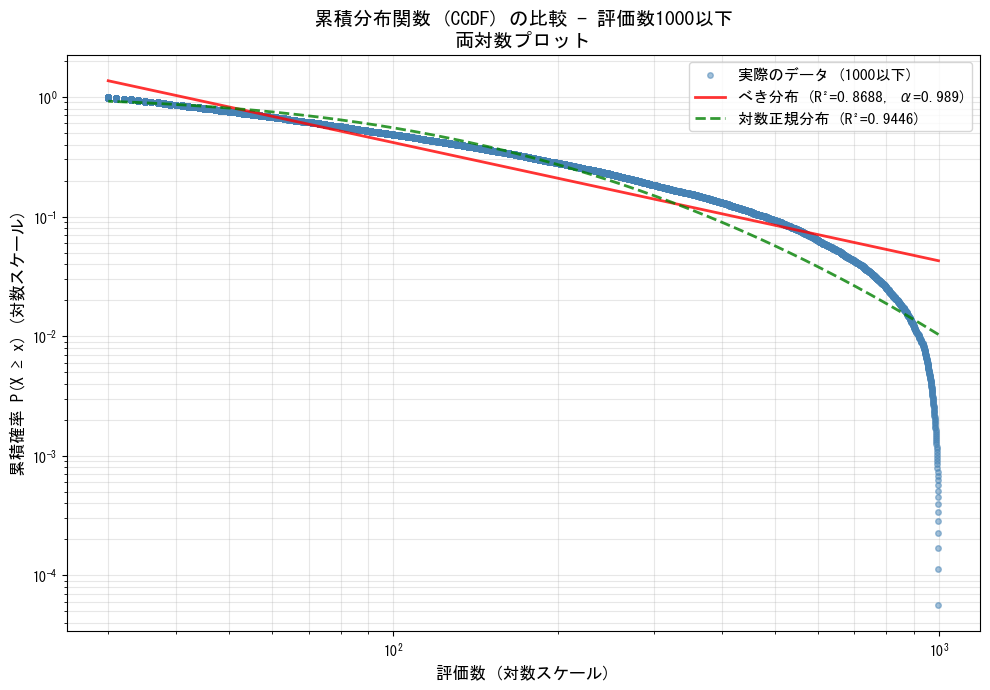

評価数1000以下のデータ - 分布フィッティング結果

データ数: 17693ゲーム
範囲: 30 ~ 999人

【べき分布】
  べき指数 α: 0.989
  決定係数 R²: 0.8688

【対数正規分布】
  パラメータ σ (shape): 0.941
  パラメータ scale: 113.1
  決定係数 R²: 0.9446

【比較】
  R²の差: 0.0758
  → 対数正規分布の方が適合度が高い (差: 0.0758)
  → 乗法的成長プロセスが支配的


In [21]:
# 評価数1000以下のデータの累積分布関数を両対数プロットでべき分布と対数正規分布と一緒に表示
below_1000_data = data[data['Users Rated'] <= 1000]['Users Rated']

fig, ax = plt.subplots(figsize=(10, 7))

# データをソートして累積確率を計算
sorted_below = np.sort(below_1000_data)[::-1]
cumulative_prob_below = np.arange(1, len(sorted_below) + 1) / len(sorted_below)

# 実際のデータをプロット
ax.loglog(sorted_below, cumulative_prob_below, 'o', markersize=4, alpha=0.5, 
          label='実際のデータ (1000以下)', color='steelblue')

# 正の値のみを使用
valid_idx = sorted_below > 0
x_valid = sorted_below[valid_idx]
y_valid = cumulative_prob_below[valid_idx]

# べき分布のフィッティング（両対数での線形回帰）
log_x = np.log10(x_valid)
log_y = np.log10(y_valid)
slope_below, intercept_below, r_value_below, _, _ = stats.linregress(log_x, log_y)
r2_power_below = r_value_below ** 2

# べき分布の理論曲線
power_fit_below = 10 ** (slope_below * np.log10(x_valid) + intercept_below)
ax.loglog(x_valid, power_fit_below, 'r-', linewidth=2, 
          label=f'べき分布 (R²={r2_power_below:.4f}, α={-slope_below:.3f})', alpha=0.8)

# 対数正規分布のフィッティング
shape_below, loc_below, scale_below = lognorm.fit(below_1000_data, floc=0)
lognorm_ccdf_below = 1 - lognorm.cdf(x_valid, shape_below, 0, scale_below)

# 対数正規分布のR²計算
from sklearn.metrics import r2_score
log_actual = np.log10(y_valid)
log_lognorm_below = np.log10(lognorm_ccdf_below)
r2_lognorm_below = r2_score(log_actual, log_lognorm_below)

# 対数正規分布の理論曲線
ax.loglog(x_valid, lognorm_ccdf_below, 'g--', linewidth=2,
          label=f'対数正規分布 (R²={r2_lognorm_below:.4f})', alpha=0.8)

ax.set_xlabel('評価数 (対数スケール)', fontsize=12)
ax.set_ylabel('累積確率 P(X ≥ x) (対数スケール)', fontsize=12)
ax.set_title('累積分布関数 (CCDF) の比較 - 評価数1000以下\n両対数プロット', fontsize=14)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()

print("=" * 60)
print("評価数1000以下のデータ - 分布フィッティング結果")
print("=" * 60)
print(f"\nデータ数: {len(below_1000_data)}ゲーム")
print(f"範囲: {below_1000_data.min():.0f} ~ {below_1000_data.max():.0f}人")

print("\n【べき分布】")
print(f"  べき指数 α: {-slope_below:.3f}")
print(f"  決定係数 R²: {r2_power_below:.4f}")

print("\n【対数正規分布】")
print(f"  パラメータ σ (shape): {shape_below:.3f}")
print(f"  パラメータ scale: {scale_below:.1f}")
print(f"  決定係数 R²: {r2_lognorm_below:.4f}")

print("\n【比較】")
print(f"  R²の差: {r2_lognorm_below - r2_power_below:.4f}")
if r2_lognorm_below > r2_power_below:
    print(f"  → 対数正規分布の方が適合度が高い (差: {r2_lognorm_below - r2_power_below:.4f})")
    print("  → 乗法的成長プロセスが支配的")
else:
    print(f"  → べき分布の方が適合度が高い (差: {r2_power_below - r2_lognorm_below:.4f})")
    print("  → 優先的選択が支配的")

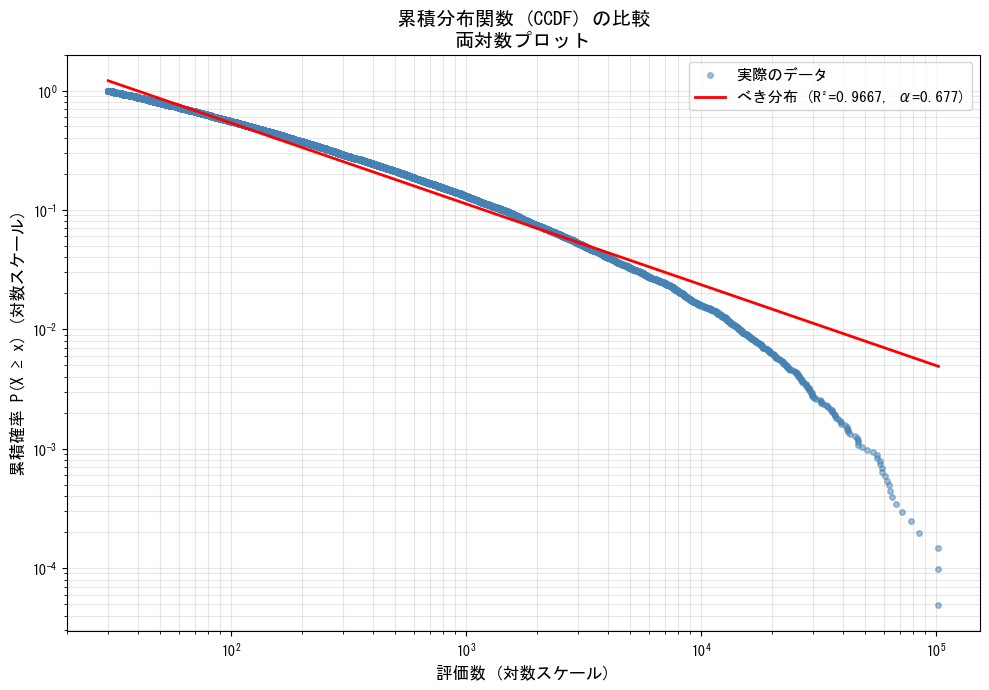

べき分布フィッティング結果

べき指数 α: 0.677
決定係数 R²: 0.9667

両対数プロットで直線 → べき分布に従っている


In [22]:
# 全体データの累積分布関数を両対数プロットで、べき分布のみと一緒に表示
fig, ax = plt.subplots(figsize=(10, 7))

# 実際のデータ
sorted_data_all = np.sort(data['Users Rated'])[::-1]
cumulative_prob_all = np.arange(1, len(sorted_data_all) + 1) / len(sorted_data_all)
ax.loglog(sorted_data_all, cumulative_prob_all, 'o', markersize=4, alpha=0.5, 
          label='実際のデータ', color='steelblue')

# べき分布の理論曲線（既に計算済みの値を使用）
x_valid = sorted_data_all[sorted_data_all > 0]
power_fit = 10 ** (slope_power * np.log10(x_valid) + intercept_power)
ax.loglog(x_valid, power_fit, 'r-', linewidth=2, 
          label=f'べき分布 (R²={r_value_power**2:.4f}, α={-slope_power:.3f})')

ax.set_xlabel('評価数 (対数スケール)', fontsize=12)
ax.set_ylabel('累積確率 P(X ≥ x) (対数スケール)', fontsize=12)
ax.set_title('累積分布関数 (CCDF) の比較\n両対数プロット', fontsize=14)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()

print("=" * 60)
print("べき分布フィッティング結果")
print("=" * 60)
print(f"\nべき指数 α: {-slope_power:.3f}")
print(f"決定係数 R²: {r_value_power**2:.4f}")
print("\n両対数プロットで直線 → べき分布に従っている")